<a href="https://colab.research.google.com/github/KaRtHiK-56/AD-Enhancing-CaseStudy/blob/main/AD_Enhancing_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                   Case Study: Advertisement Creative Performance Prediction

## Objective:
Develop a machine learning model to predict the performance of advertisement creatives based on historical data.

#***INTRODUCTION*** :

To enhance the AD campaign strategies by leveraging machine learning to predict the performance of different advertisement creativity across various platforms.

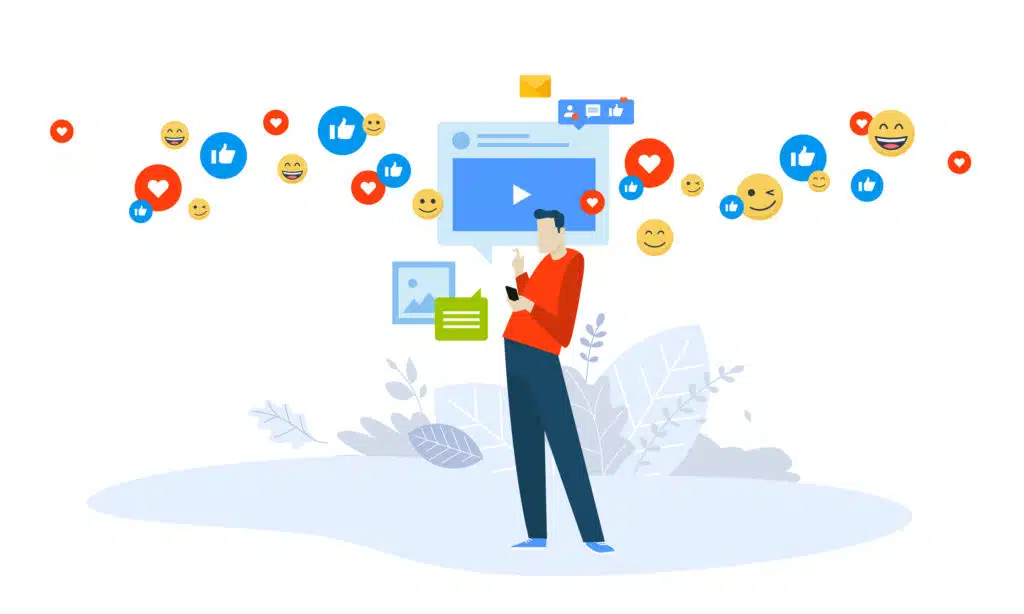

*****Created a sample data (around 50k-1L records) that includes:*****
    
*****1.Advertisement Creative Data:***** Details of different ad creatives, including visuals, text, format, and variations used in past campaigns.

*****2.Performance Metrics:***** Metrics such as click-through rates (CTR), conversion rates, impressions, engagement metrics (likes, shares, comments), and other relevant KPIs for each ad creative.

*****3.Platform and Audience Data:***** Information about the advertising platform, target audience demographics, time of ad placement, etc.

*****4.Additional Contextual Data (Optional):***** Seasonality, external events, trends, etc., that might influence ad performance.


## Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta
import random
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

## Columns and their Descriptions

*****Account ID:***** Unique identifier for the advertising account.
    
*****Campaign ID:***** Identifier for specific ad campaigns, linked to Account ID for grouping.
    
*****Ad ID:***** Identifier for individual ads within campaigns, linked to Campaign ID.
    
*****Ad Background Color:***** Color used in the ad's background. Categorical: randomly selected colors.
    
*****Ad Placement:***** Location where the ad is displayed (e.g., news feed, sidebar).
    
*****UTM Source:***** Traffic source (e.g., Facebook, Google).
    
*****UTM Medium:***** Traffic medium (e.g., CPC, banner).
    
*****Impression Device:***** Device used for viewing the ad (e.g., mobile, desktop).
    
*****Publisher Platform:***** Platform where the ad was published (e.g., Facebook, Instagram).
    
*****Age:***** Age group targeted by the ad. Categorical segmentation based on demographics.
    
*****Gender:***** Gender of the targeted audience.
    
*****Content Type/Format:***** Format of the ad (e.g., image, video, carousel).
    
*****Clicks:***** Number of times users clicked on the ad. Calculated based on engagement or simulated data.
    
*****Impressions:***** Number of times the ad was shown. Generated or based on historical data.
    
*****Spend:***** Amount spent on the ad campaign.
    
*****CPM:***** Cost per thousand impressions (if available). Calculated based on Spend and Impressions.
    
*****CTC:***** Cost to convert a user (if available). Calculated based on Spend and conversion rates.
    
*****CTR:***** Click-through rate - Clicks/Impressions * 100. Calculated based on Clicks and Impressions.
    
*****Budget (Daily, Lifetime, Remaining budget):***** Allocation and remaining budget for the campaign.
        
*****Video Ad duration (Start_at, end_at):***** Duration of video ad, time-related data.
    
*****Video view count:***** Number of views the video ad received.
    
*****Gender of person/model in Ad:***** Gender of the individual shown in the ad.
    
*****Age of person/model in Ad:***** Age group of the individual shown in the ad.
    
*****Emotions of person/model in Ad:***** Emotions depicted by the individual shown in the ad.
    
*****Object label in Ad:***** Main object or theme depicted in the ad.
    
*****Object shape in Ad:***** Shape emphasized or prevalent in the ad.
    
*****Likes:***** Number of likes received on the ad.
    
*****Shares:***** Number of shares received on the ad.
    
*****Comments:***** Number of comments received on the ad.

## Generating synthetic data

## Creating a dataset with synthetic data requires defining the schema and generating records.For the purposes of demonstration, here's a simplified example of how such a dataset might look:

*****Advertisement Creative Data:*****
AdID (Unique Identifier)
CreativeType (Image, Video, Carousel)
Visuals (File URLs or descriptors)
Text (Ad copy or description)
Format (Banner, Full-screen, Story)

*****Performance Metrics:*****
ClickThroughRate (CTR)
ConversionRate
Impressions
Likes
Shares
Comments

*****Platform and Audience Data:*****
Platform (Facebook, Instagram, Google, etc.)
TargetDemographics (Age, Gender, Location, Interests)
TimeOfPlacement (Date, Time)
AdSpend (Budget allocated)

*****Additional Contextual Data:*****
Seasonality
ExternalEvents
Trends

In [ ]:
# Generating synthetic data
num_records = 50000  # Adjust as needed

# Advertisement Creative Data
account_ids = ['Account_' + str(random.randint(1000, 10000)) for i in range(num_records)]
campaign_ids = ['Campaign_' + str(random.randint(10000, 50000)) for i in range(num_records)]
ad_ids = ['Ad' + str(i) for i in range(1, num_records + 1)]
ad_background_colors = np.random.choice(['Red', 'Blue', 'Green', 'Yellow'], num_records)
ad_placements = np.random.choice(['Header', 'Sidebar', 'Footer'], num_records)

#UTMs, or Urchin Tracking Modules, are a tracking device to help you get really specific with your traffic source.
#UTM tracking involves adding unique UTM codes to your URLs to easily identify exactly where your traffic is coming from
utm_sources = np.random.choice(['Source_A', 'Source_B', 'Source_C'], num_records)

#utm_medium=email – this defines the medium to be an email. This means any traffic coming from this source would be from
#this particular email. utm_campaign=black+friday+sale – here, the campaign is defined as a Black Friday sale
utm_mediums = np.random.choice(['Medium_A', 'Medium_B', 'Medium_C'], num_records)

#CPC (Cost Per Click): you pay when someone clicks on your ad.
#CPM (Cost Per Thousand Impressions): you pay based on how many people see your ads

impression_devices = np.random.choice(['Desktop', 'Mobile', 'Tablet'], num_records)
publisher_platforms = np.random.choice(['Facebook', 'Instagram', 'Google'], num_records)
gender_ratio = [0.56, 0.44]  # Male: 56%, Female: 44%
genders = np.random.choice(['Male', 'Female'], num_records,p=gender_ratio)

#An image carousel is a container (slideshow) of images or info that users can select by clicking a button that directs
#them forward or backward in the slideshow. An image carousel makes a website more interactive by enhancing the user experience
content_types = np.random.choice(['Image', 'Video', 'Carousel'], num_records)

# Performance Metrics-
#Metrics such as click-through rates (CTR), conversion rates, impressions, engagement metrics (likes, shares, comments),
#and other relevant KPIs for each ad creative

#Number of times the ad was shown.
impressions = np.random.randint(1000, 100000, num_records)
#Number of times the ad was clicked.
Clicks=np.random.randint(100, 50000, num_records)


# Additional Contextual Data
#I have taken this year 2023
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
dates = [start_date + timedelta(days=random.randint(0, 365)) for _ in range(num_records)]
external_events = np.random.choice(['Event A', 'Event B', 'No Event'], num_records)
#Time series
trends = np.random.choice(['Upward', 'Stable', 'Downward'], num_records)

# Additional Advertisement Data
video_view_count = np.random.randint(1000, 100000, num_records)
video_ad_duration_start = [datetime(2023, 1, 1) + timedelta(days=random.randint(1, 365)) for _ in range(num_records)]
video_ad_duration_end = [start + timedelta(seconds=random.randint(30, 180)) for start in video_ad_duration_start]
person_age = np.random.randint(18, 65, num_records)
emotions = np.random.choice(['Happy', 'Sad', 'Neutral'], num_records)
object_labels = np.random.choice(['Product', 'Service', 'Brand'], num_records)
object_shapes = np.random.choice(['Square', 'Circle', 'Triangle'], num_records)
likes = np.random.randint(50, 5000, num_records)
shares = np.random.randint(10, 1000, num_records)
comments = np.random.randint(5, 500, num_records)

#Internet usage and time spent
Daily_Internet_Usage= np.random.normal(180, 50, num_records)
Daily_Time_Spent_on_Platform= np.random.normal(120, 30, num_records)

# Create DataFrame
data = {
    'AccountID': account_ids,
    'CampaignID': campaign_ids,
    'AdID': ad_ids,
    'AdBackgroundColor': ad_background_colors,
    'AdPlacement': ad_placements,
    'UTMSource': utm_sources,
    'UTMMedium': utm_mediums,
    'ImpressionDevice': impression_devices,
    'PublisherPlatform': publisher_platforms,
    'Gender': genders,
    'ContentType': content_types,
    'Clicks':Clicks,
    'Impressions': impressions,
    'Date': dates,
    'ExternalEvents': external_events,
    'Trends': trends,
    'VideoViewCount': video_view_count,
    'VideoAdDurationStart': video_ad_duration_start,
    'VideoAdDurationEnd': video_ad_duration_end,
    'PersonAge': person_age,
    'Emotions': emotions,
    'ObjectLabel': object_labels,
    'ObjectShape': object_shapes,
    'Likes': likes,
    'Shares': shares,
    'Comments': comments,
    'Daily_Internet_Usage':Daily_Internet_Usage,
    'Daily_Time_Spent_on_Platform':Daily_Time_Spent_on_Platform

}
df = pd.DataFrame(data)


s={'account_ids': ['Account_' + str(random.randint(1000, 10000)) for i in range(num_records)]}
df1 = pd.DataFrame(s)
df1.index
random_indices = np.random.choice(df1.index, size=int(len(df1) * 0.55), replace=False)
df.loc[random_indices, 'Clicks'] = 0

# Generating 'Conversions' based on 'Clicks'
#The conversion rate is calculated based on actions that indicate successful engagement or attainment of a goal after a user interacts with an ad
df['Number of Conversions'] = np.random.randint(10, 100, len(df))
channels = ['Organic', 'Paid', 'Referral', 'Social Media', 'Email']  # Example acquisition channels
ratios = [0.12, 0.18, 0.28, 0.22, 0.20]  # Ratios for each channel
df['Channel'] = np.random.choice(channels, num_records, p=ratios)


df.head(1)

AccountID      CampaignID AdID AdBackgroundColor AdPlacement UTMSource  \
0  Account_4501  Campaign_46372  Ad1               Red      Footer  Source_A   

  UTMMedium ImpressionDevice PublisherPlatform  Gender ContentType  Clicks  \
0  Medium_C           Tablet         Instagram  Female    Carousel       0   

   Impressions       Date ExternalEvents    Trends  VideoViewCount  \
0        67621 2023-11-20       No Event  Downward           60018   

  VideoAdDurationStart  VideoAdDurationEnd  PersonAge Emotions ObjectLabel  \
0           2023-10-28 2023-10-28 00:02:40         58    Happy     Product   

  ObjectShape  Likes  Shares  Comments  Daily_Internet_Usage  \
0      Circle   4812     757        30             188.14796   

   Daily_Time_Spent_on_Platform  Number of Conversions  Channel  
0                    121.345177                     41  Organic

## Data Cleaning and Preprocessing

In [ ]:
df=pd.read_csv('Synthetic_New_3.csv')
account_ids = ['Account_' + str(random.randint(1000, 10000)) for i in range(num_records)]
campaign_ids = ['Campaign_' + str(random.randint(10000, 50000)) for i in range(num_records)]
ad_ids = ['Ad' + str(i) for i in range(1, num_records + 1)]
df['AccountID']=account_ids
df['CampaignID']=campaign_ids
df['AdID']=ad_ids

# Calculate Conversion Rate
df['Conversion_Rate'] = 0  # Initialize Conversion Rate column
# Calculate Conversion Rate without causing infinite values
non_zero_clicks = df['Clicks'] != 0
df.loc[non_zero_clicks, 'Conversion_Rate'] = (df.loc[non_zero_clicks, 'Number of Conversions'] / df.loc[non_zero_clicks, 'Clicks']) * 100


#CPM refers to the cost per thousand impressions. The formula is:
df['CPM'] = df['Spend'] / df['Impressions'] * 1000
#CTR measures the percentage of people who click on an ad after seeing it.
df['CTR'] = df['Clicks'] / df['Impressions'] * 100
#CTC represents the cost incurred by the company for each conversion.
#CTC stands for "cost-per-click." It is the amount an advertiser pays for a single click on their ad.
#df['CPC'] = df['Spend'] / df['Clicks']
#CPC = total_cost / number_of_clicks. You may also derive it from CPM and CTR:
#CPC = (CPM / 1,000) / (CTR / 100) = 0.1 * CPM / CTR.
df['CPC'] = (0.1 * df['CPM']) / df['CTR']
df['Gender']=np.where(df['Gender']=='Male',1,0)
#df.drop('Date',axis=1,inplace=True)
df.head(1)

AccountID      CampaignID AdID AdBackgroundColor AdPlacement UTMSource  \
0  Account_2887  Campaign_43605  Ad1              Blue      Header  Source_B   

  UTMMedium ImpressionDevice PublisherPlatform  Gender ContentType  Clicks  \
0  Medium_A          Desktop          Facebook       1       Video       0   

   Impressions        Date ExternalEvents    Trends  VideoViewCount  \
0       105729  2023-02-12       No Event  Downward           92830   

   PersonAge Emotions ObjectLabel ObjectShape  Likes  Shares  Comments  \
0         41  Neutral     Product      Square   1708       2       224   

   Daily_Internet_Usage  Daily_Time_Spent_on_Platform  Number of Conversions  \
0                   274                           104                      6   

    Channel  campaign_days product_id  Daily_Budget  Spend  \
0  Referral             15    Prod_14         22033      4   

   Video_Duration_In_Seconds  Clicked_on_Ad  DayofWeek  Month  \
0                         36              0          2     11   

   Conversion_Rate       CPM  CTR  CPC  
0              0.0  0.037833  0.0  inf

In [ ]:
#shape of the dataframe
df.shape

(50000, 40)

In [ ]:
#elements in dataframe
df.size

2000000

In [ ]:
# Calculate the total count of missing values for each variable
total_missing = df.isnull().sum()

# Calculate the percentage of missing values for each variable
percent_missing = (total_missing * 100) / df.isnull().count()
percent_missing = percent_missing.round(decimals=0)  # Round the percentage values

# Create a DataFrame to store the missing data information
missing_data = pd.DataFrame({
    'Total': total_missing,
    'Percentage of Missing Values': percent_missing,
    'Type': df.dtypes
})

# Sort the DataFrame based on the total count of missing values in descending order
missing_data = missing_data.sort_values(by='Total', ascending=False)

missing_data

Total  Percentage of Missing Values     Type
CPC                            1582                           3.0  float64
CampaignID                        0                           0.0   object
Shares                            0                           0.0    int64
Comments                          0                           0.0    int64
Daily_Internet_Usage              0                           0.0    int64
Daily_Time_Spent_on_Platform      0                           0.0    int64
Number of Conversions             0                           0.0    int64
Channel                           0                           0.0   object
campaign_days                     0                           0.0    int64
product_id                        0                           0.0   object
Daily_Budget                      0                           0.0    int64
Spend                             0                           0.0    int64
Video_Duration_In_Seconds         0                           0.0    int64
Clicked_on_Ad                     0                           0.0    int64
DayofWeek                         0                           0.0    int64
Month                             0                           0.0    int64
Conversion_Rate                   0                           0.0  float64
CPM                               0                           0.0  float64
CTR                               0                           0.0  float64
Likes                             0                           0.0    int64
AccountID                         0                           0.0   object
ObjectLabel                       0                           0.0   object
Gender                            0                           0.0    int64
AdID                              0                           0.0   object
AdBackgroundColor                 0                           0.0   object
AdPlacement                       0                           0.0   object
UTMSource                         0                           0.0   object
UTMMedium                         0                           0.0   object
ImpressionDevice                  0                           0.0   object
PublisherPlatform                 0                           0.0   object
ContentType                       0                           0.0   object
Emotions                          0                           0.0   object
Clicks                            0                           0.0    int64
Impressions                       0                           0.0    int64
Date                              0                           0.0   object
ExternalEvents                    0                           0.0   object
Trends                            0                           0.0   object
VideoViewCount                    0                           0.0    int64
PersonAge                         0                           0.0    int64
ObjectShape                       0                           0.0   object

In [ ]:
#statistical summary of the dataframe
df.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning:

invalid value encountered in subtract



Gender         Clicks    Impressions  VideoViewCount  \
count  50000.000000   50000.000000   50000.000000    50000.000000   
mean       0.569740   24151.553800  119305.717620    50758.371400   
std        0.495117   33434.672134   67195.965662    28640.334242   
min        0.000000       0.000000    2400.000000     1013.000000   
25%        0.000000       0.000000   61492.000000    25945.000000   
50%        1.000000       0.000000  120498.000000    50947.500000   
75%        1.000000   47183.500000  176991.500000    75511.500000   
max        1.000000  107088.000000  235395.000000    99986.000000   

          PersonAge         Likes        Shares      Comments  \
count  50000.000000  50000.000000  50000.000000  50000.000000   
mean      41.017220   1300.673840    141.783760    210.266900   
std       13.509602    739.839952     79.384016    116.813531   
min       18.000000     26.000000      2.000000      4.000000   
25%       29.000000    660.000000     73.000000    112.000000   
50%       41.000000   1293.000000    143.000000    212.000000   
75%       53.000000   1937.000000    210.000000    311.000000   
max       64.000000   2598.000000    281.000000    413.000000   

       Daily_Internet_Usage  Daily_Time_Spent_on_Platform  \
count          50000.000000                  50000.000000   
mean             373.999000                     79.089680   
std              104.956394                     19.906709   
min              -22.000000                     10.000000   
25%              299.000000                     65.000000   
50%              375.000000                     79.000000   
75%              446.000000                     93.000000   
max              748.000000                    153.000000   

       Number of Conversions  campaign_days  Daily_Budget         Spend  \
count           50000.000000   50000.000000   50000.00000  50000.000000   
mean               34.873900      23.907060   17822.81308     14.385040   
std                16.379993       9.116682    7382.26669      7.979299   
min                 6.000000      11.000000    8813.00000      0.000000   
25%                21.000000      15.000000   12338.00000      8.000000   
50%                35.000000      22.000000   15423.00000     14.000000   
75%                49.000000      31.000000   22035.00000     21.000000   
max                64.000000      42.000000   30849.00000     30.000000   

       Video_Duration_In_Seconds  Clicked_on_Ad     DayofWeek         Month  \
count               50000.000000   50000.000000  50000.000000  50000.000000   
mean                   98.250020       0.462360      3.005080      6.606040   
std                    40.520453       0.498586      2.031122      3.441661   
min                    27.000000       0.000000      0.000000      1.000000   
25%                    63.000000       0.000000      1.000000      4.000000   
50%                    98.000000       0.000000      3.000000      7.000000   
75%                   134.000000       1.000000      5.000000     10.000000   
max                   167.000000       1.000000      6.000000     12.000000   

       Conversion_Rate           CPM           CTR           CPC  
count     50000.000000  50000.000000  50000.000000  4.841800e+04  
mean          0.146363      0.285707     48.175302           inf  
std           4.437935      0.637990    167.258442           NaN  
min           0.000000      0.000000      0.000000  0.000000e+00  
25%           0.000000      0.063268      0.000000  3.339400e-04  
50%           0.000000      0.120453      0.000000           NaN  
75%           0.063785      0.235337     40.202310           NaN  
max         850.000000     12.106538   4214.087302           inf

In [ ]:
#checking for the duplicated values
df.duplicated().sum()

0

In [ ]:
#Unique values
df.nunique()

AccountID                        8963
CampaignID                      28650
AdID                            50000
AdBackgroundColor                   4
AdPlacement                         3
UTMSource                           3
UTMMedium                           3
ImpressionDevice                    3
PublisherPlatform                   3
Gender                              2
ContentType                         3
Clicks                          20815
Impressions                     44845
Date                              366
ExternalEvents                      3
Trends                              3
VideoViewCount                  39219
PersonAge                          47
Emotions                            3
ObjectLabel                         3
ObjectShape                         3
Likes                            2573
Shares                            280
Comments                          410
Daily_Internet_Usage              716
Daily_Time_Spent_on_Platform      139
Number of Co

#### OBSERVATIONS

1. The data comprises of 50,000 datas and 40 features.
2. Totally 20,00,000 elements of data is present.
3. CPC is the only column that has missing values about 3%.
4. No duplicated values are present in the data.

## EXPLORATORY DATA ANALYSIS

In [ ]:
#seperating the numerical and categorical features
numerical = df.select_dtypes(include='number')
categorical= df.select_dtypes(exclude='number')

In [ ]:
numerical.head()

Gender  Clicks  Impressions  VideoViewCount  PersonAge  Likes  Shares  \
0       1       0       105729           92830         41   1708       2   
1       0       0       170564           70559         30   2558     117   
2       1       0        40507           16706         25   1339     194   
3       0       0       146867           28927         61   2034     133   
4       1       0       124167           38014         32   1197     274   

   Comments  Daily_Internet_Usage  Daily_Time_Spent_on_Platform  \
0       224                   274                           104   
1       174                   414                            72   
2       320                   250                            58   
3       287                   442                            93   
4       135                   418                            77   

   Number of Conversions  campaign_days  Daily_Budget  Spend  \
0                      6             15         22033      4   
1                     12             22         15423     20   
2                     55             28         12338     23   
3                     48             11         30847      1   
4                     48             34         10282     24   

   Video_Duration_In_Seconds  Clicked_on_Ad  DayofWeek  Month  \
0                         36              0          2     11   
1                        158              0          4      3   
2                        131              0          5      6   
3                        154              0          3      6   
4                         31              0          5      1   

   Conversion_Rate       CPM  CTR  CPC  
0              0.0  0.037833  0.0  inf  
1              0.0  0.117258  0.0  inf  
2              0.0  0.567803  0.0  inf  
3              0.0  0.006809  0.0  inf  
4              0.0  0.193288  0.0  inf

In [ ]:
numerical.shape

(50000, 22)

In [ ]:
categorical.head()

AccountID      CampaignID AdID AdBackgroundColor AdPlacement UTMSource  \
0  Account_2887  Campaign_43605  Ad1              Blue      Header  Source_B   
1  Account_4386  Campaign_40548  Ad2              Blue      Header  Source_A   
2  Account_8444  Campaign_43589  Ad3            Yellow      Footer  Source_C   
3  Account_9898  Campaign_41282  Ad4              Blue      Header  Source_B   
4  Account_7014  Campaign_20171  Ad5             Green      Footer  Source_C   

  UTMMedium ImpressionDevice PublisherPlatform ContentType        Date  \
0  Medium_A          Desktop          Facebook       Video  2023-02-12   
1  Medium_C           Tablet          Facebook    Carousel  2023-09-23   
2  Medium_C           Tablet          Facebook    Carousel  2023-07-12   
3  Medium_C          Desktop          Facebook       Image  2023-11-16   
4  Medium_A           Tablet            Google       Image  2023-09-30   

  ExternalEvents    Trends Emotions ObjectLabel ObjectShape       Channel  \
0       No Event  Downward  Neutral     Product      Square      Referral   
1        Event B    Stable  Neutral       Brand    Triangle  Social Media   
2        Event A    Upward  Neutral       Brand      Circle       Organic   
3        Event B    Stable    Happy     Product      Square      Referral   
4        Event B  Downward      Sad     Product    Triangle      Referral   

  product_id  
0    Prod_14  
1     Prod_2  
2    Prod_25  
3    Prod_17  
4    Prod_34

In [ ]:
categorical.shape

(50000, 18)

*****Skewness checking*****

In [ ]:
#skewnwss checking
def skewness(score):
  skew = score.skew()
  if -0.5 < skew < 0.5:
    result = 'It is Normally Distributed'
    return result , skew ,score
  elif skew < -0.5:
    result = 'The data is Left skewed'
    return result , skew ,score
  elif skew > 0.5:
    result = 'The data is right skewed'
    return result , skew ,score

In [ ]:
for i in numerical:
  skew = skewness(data[i])
  print(skew)

Streaming output truncated to the last 5000 lines.
45001    103313
45002    148033
45003     65413
45004    157199
45005     48459
45006    229279
45007    143760
45008    194155
45009    222707
45010     67304
45011    173405
45012     37753
45013    216704
45014    205812
45015     60248
45016    105719
45017    138854
45018    122640
45019    195711
45020    151205
45021     81549
45022     10398
45023     50343
45024    176653
45025     12840
45026    130810
45027     90698
45028     47270
45029    180223
45030    194060
45031    154589
45032    114019
45033    104507
45034    223033
45035     78904
45036     90298
45037    232762
45038    147386
45039     78477
45040    171713
45041    156267
45042     51220
45043     32971
45044    199418
45045    110046
45046    160226
45047    197640
45048     70063
45049     69015
45050     81623
45051     79965
45052    175160
45053    211722
45054    164309
45055    109120
45056    136548
45057     33410
45058    107000
45059     13046
45060

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
45001     0.271021
45002     0.114839
45003     0.305750
45004     0.101782
45005     0.268268
45006     0.034892
45007     0.118253
45008     0.046355
45009     0.107765
45010     0.297159
45011     0.046135
45012     0.158928
45013     0.023073
45014     0.068023
45015     0.099588
45016     0.075672
45017     0.000000
45018     0.138617
45019     0.117520
45020     0.085976
45021     0.061313
45022     0.865551
45023     0.178774
45024     0.090573
45025     0.856698
45026     0.099381
45027     0.143333
45028     0.423101
45029     0.138717
45030     0.092755
45031     0.135844
45032     0.114016
45033     0.038275
45034     0.058287
45035     0.063368
45036     0.000000
45037     0.000000
45038     0.081419
45039     0.140168
45040     0.116473
45041     0.000000
45042     0.175713
45043     0.333627
45044     0.115336
45045     0.245352
45046     0.168512
45047     0.091075
45048     0.328276
45049     0.202854
45050     0.196023

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#max,min,standard deviation,mean and median of numerical data
for i in numerical:
  print('The maximum of', i, 'is:',df[i].max())
  print('The minimum of', i, 'is:',df[i].min())
  print('The mean of', i, 'is:',df[i].mean())
  print('The median of', i, 'is:',df[i].median())
  print('*'*100)

The maximum of Gender is: 1
The minimum of Gender is: 0
The mean of Gender is: 0.56974
The median of Gender is: 1.0
****************************************************************************************************
The maximum of Clicks is: 107088
The minimum of Clicks is: 0
The mean of Clicks is: 24151.5538
The median of Clicks is: 0.0
****************************************************************************************************
The maximum of Impressions is: 235395
The minimum of Impressions is: 2400
The mean of Impressions is: 119305.71762
The median of Impressions is: 120498.0
****************************************************************************************************
The maximum of VideoViewCount is: 99986
The minimum of VideoViewCount is: 1013
The mean of VideoViewCount is: 50758.3714
The median of VideoViewCount is: 50947.5
****************************************************************************************************
The maximum of PersonAge is: 64
The mini

In [ ]:
# unique values in categorical columns
for i in categorical:
  print(i,categorical[i].unique())
  print('*'*50)

AccountID ['Account_2887' 'Account_4386' 'Account_8444' ... 'Account_3594'
 'Account_6046' 'Account_9893']
**************************************************
CampaignID ['Campaign_43605' 'Campaign_40548' 'Campaign_43589' ... 'Campaign_15710'
 'Campaign_44227' 'Campaign_30815']
**************************************************
AdID ['Ad1' 'Ad2' 'Ad3' ... 'Ad49998' 'Ad49999' 'Ad50000']
**************************************************
AdBackgroundColor ['Blue' 'Yellow' 'Green' 'Red']
**************************************************
AdPlacement ['Header' 'Footer' 'Sidebar']
**************************************************
UTMSource ['Source_B' 'Source_A' 'Source_C']
**************************************************
UTMMedium ['Medium_A' 'Medium_C' 'Medium_B']
**************************************************
ImpressionDevice ['Desktop' 'Tablet' 'Mobile']
**************************************************
PublisherPlatform ['Facebook' 'Google' 'Instagram']
*************************

*****Outliers*****

In [ ]:
# Finding the Outliers
for i in df.select_dtypes(exclude='object').columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    IQR=q3 - q1
    ub=q3 + (1.5*IQR)
    lb=q1 - (1.5*IQR)
    print(f'lower_outliers for {i} is',df[df[i]<lb].shape)
    print(f'upper_outliers for {i} is',df[df[i]>ub].shape)

lower_outliers for Gender is (0, 40)
upper_outliers for Gender is (0, 40)
lower_outliers for Clicks is (0, 40)
upper_outliers for Clicks is (0, 40)
lower_outliers for Impressions is (0, 40)
upper_outliers for Impressions is (0, 40)
lower_outliers for VideoViewCount is (0, 40)
upper_outliers for VideoViewCount is (0, 40)
lower_outliers for PersonAge is (0, 40)
upper_outliers for PersonAge is (0, 40)
lower_outliers for Likes is (0, 40)
upper_outliers for Likes is (0, 40)
lower_outliers for Shares is (0, 40)
upper_outliers for Shares is (0, 40)
lower_outliers for Comments is (0, 40)
upper_outliers for Comments is (0, 40)
lower_outliers for Daily_Internet_Usage is (147, 40)
upper_outliers for Daily_Internet_Usage is (134, 40)
lower_outliers for Daily_Time_Spent_on_Platform is (142, 40)
upper_outliers for Daily_Time_Spent_on_Platform is (179, 40)
lower_outliers for Number of Conversions is (0, 40)
upper_outliers for Number of Conversions is (0, 40)
lower_outliers for campaign_days is (0, 40

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning:

invalid value encountered in subtract



#### Normal Distribution

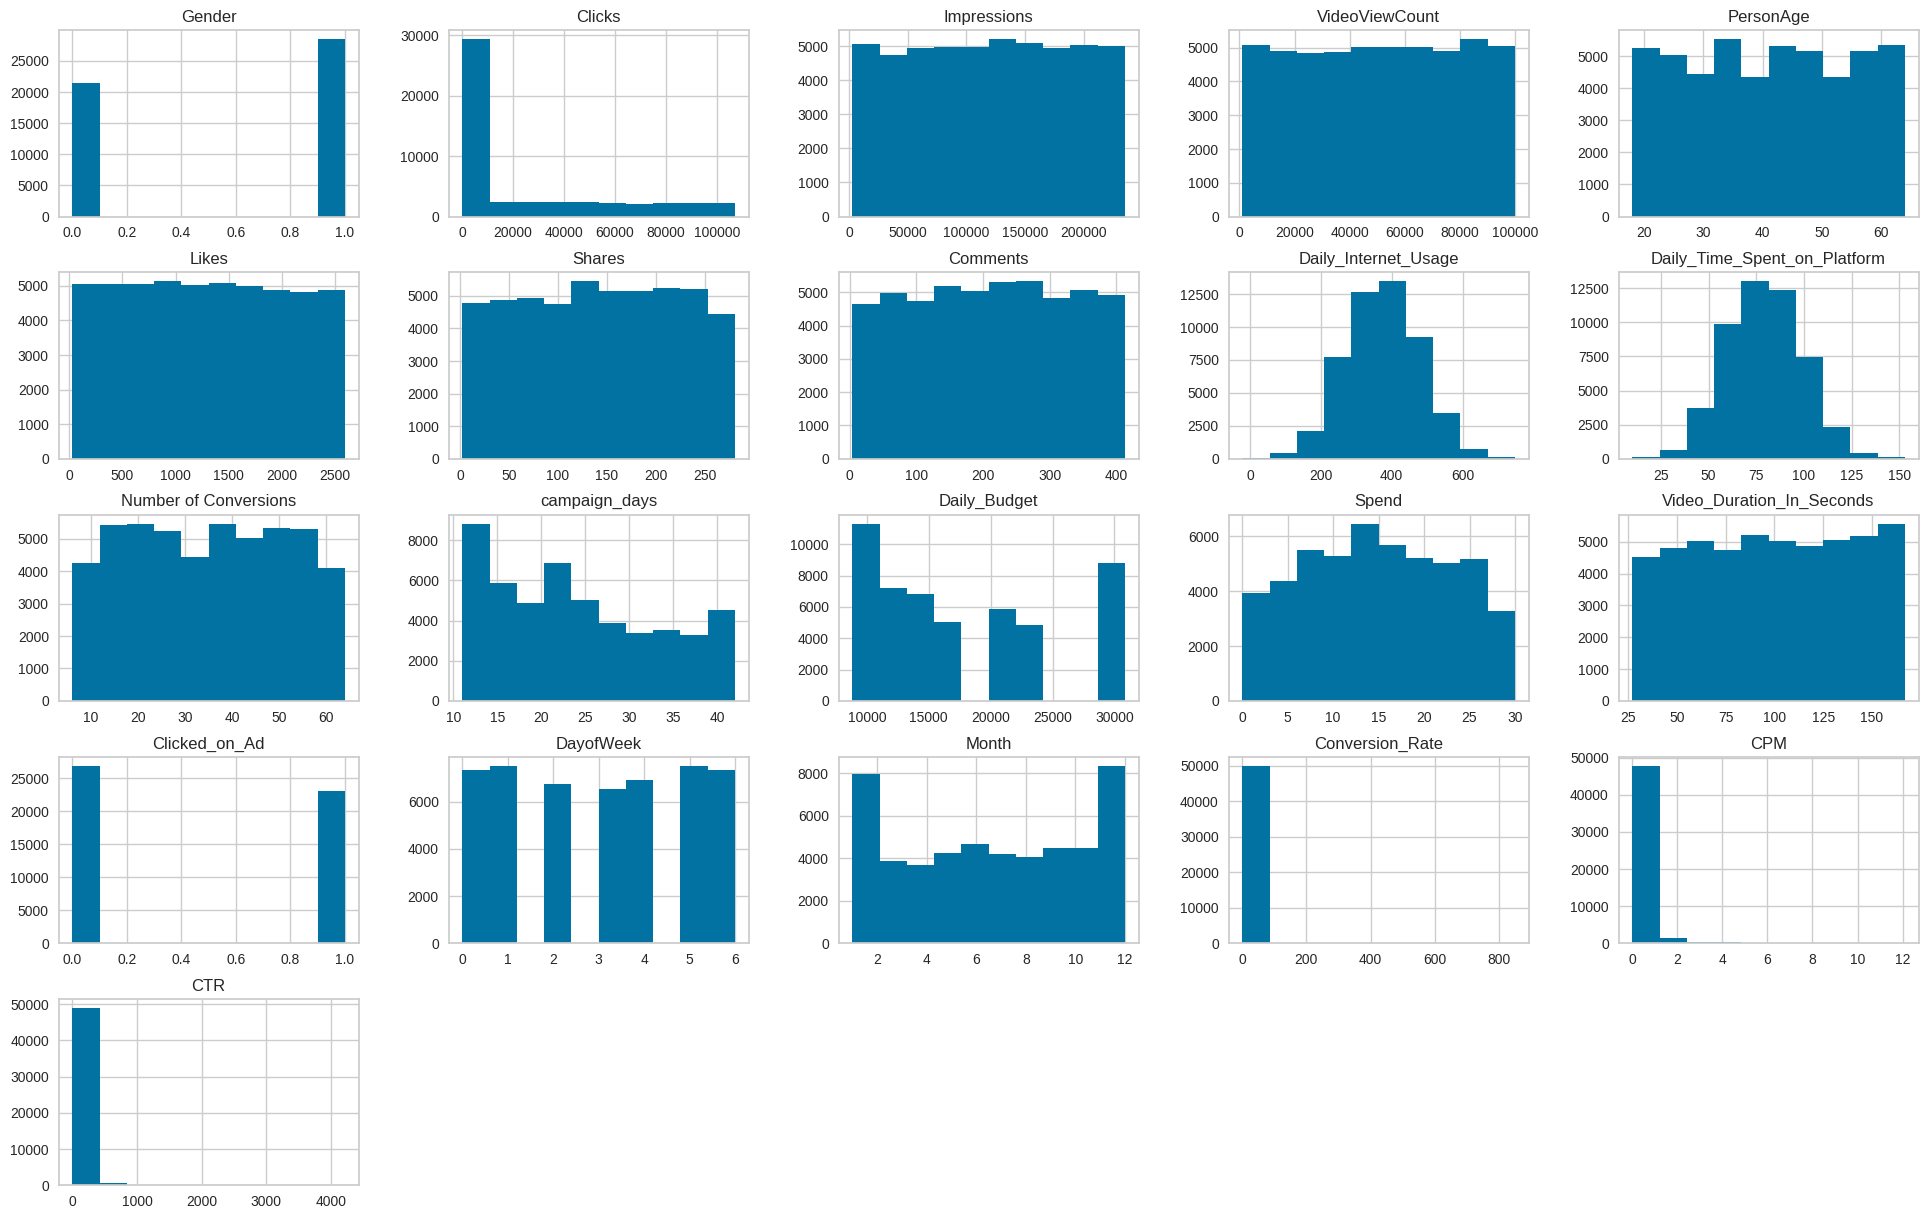

In [ ]:
#Checking distribution for numerical columns
plt.rcParams['figure.figsize']=[24,15]
a=df.copy()
del a['CPC']
a.hist()
plt.show()

#### Shapiro Wilk Test

In [ ]:
from scipy.stats import shapiro
for i in df.select_dtypes(exclude='object').columns:
    stat,p=shapiro(df[i])
    print(stat,p)
    if p>0.05:
        print(f'{i} is Normal Distributed')
    else:
        print(f'{i} is Not Normal Distributed')

0.6289898157119751 0.0
Gender is Not Normal Distributed
0.7369067668914795 0.0
Clicks is Not Normal Distributed
0.9554718732833862 0.0
Impressions is Not Normal Distributed
0.9542322158813477 0.0
VideoViewCount is Not Normal Distributed
0.9554271697998047 0.0
PersonAge is Not Normal Distributed
0.9558888673782349 0.0
Likes is Not Normal Distributed
0.9580550789833069 0.0
Shares is Not Normal Distributed
0.9579143524169922 0.0
Comments is Not Normal Distributed
0.9995436072349548 1.6693585402904887e-09
Daily_Internet_Usage is Not Normal Distributed
0.9981536269187927 6.20097809174291e-23
Daily_Time_Spent_on_Platform is Not Normal Distributed
0.9567987322807312 0.0
Number of Conversions is Not Normal Distributed
0.9357859492301941 0.0
campaign_days is Not Normal Distributed
0.859326958656311 0.0
Daily_Budget is Not Normal Distributed
0.9677370190620422 0.0
Spend is Not Normal Distributed
0.955894410610199 0.0
Video_Duration_In_Seconds is Not Normal Distributed
0.6344823837280273 0.0
Clic

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



## OBSERVATIONS

1. Totally 17 categotical and 22 numerical columns are present.
2. From the above Capping/Winsorization method we can see there is no outliers.
3. Clicks,VideoViewCount,Comments,Daily_Internet_Usage,Daily_Time_Spent_on_Platform,Number of Conversions,campaign_days,Spend, are the columns that are normally distributed and remaining all are skewed.

****DATA VISUALIZATION****


****Univariate analysis****

In [ ]:
#histogram and barplot for the numeric and categorical variable is yet to be done
"""
for i in numerical:
  fig = px.box(numerical[i])
  fig.show()

for i in categorical:
  fig = px.bar(categorical[i])
  fig.show()


"""

'\nfor i in numerical:\n  fig = px.box(numerical[i])\n  fig.show()\n\nfor i in categorical:\n  fig = px.bar(categorical[i])\n  fig.show()\n\n\n'

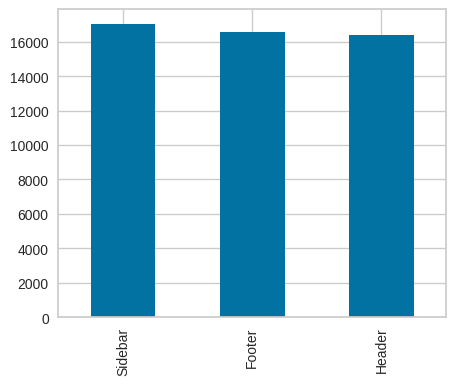

In [ ]:
plt.figure(figsize=(5, 4))
df['AdPlacement'].value_counts().plot(kind='bar')
plt.show()

<Axes: >

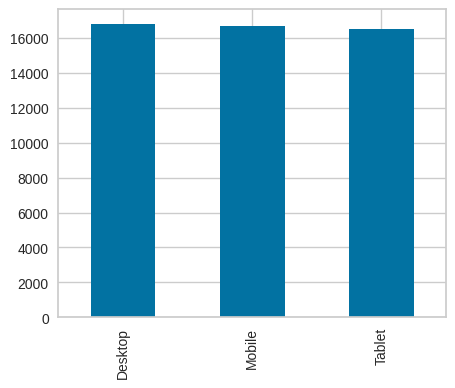

In [ ]:
plt.figure(figsize=(5, 4))

df['ImpressionDevice'].value_counts().plot(kind='bar')

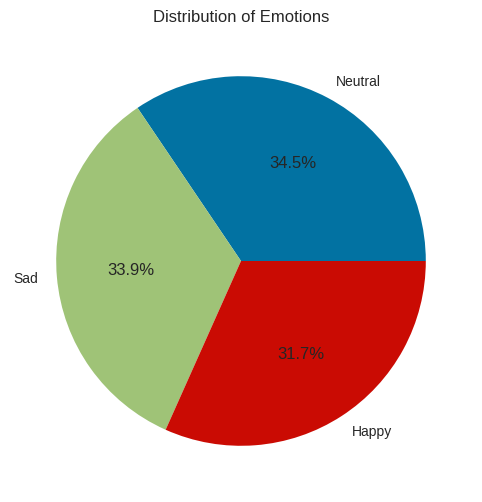

In [ ]:
# Calculate the count of each category in the 'advertiser_name' column
counts = df['Emotions'].value_counts().head(10)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Emotions')
plt.show()

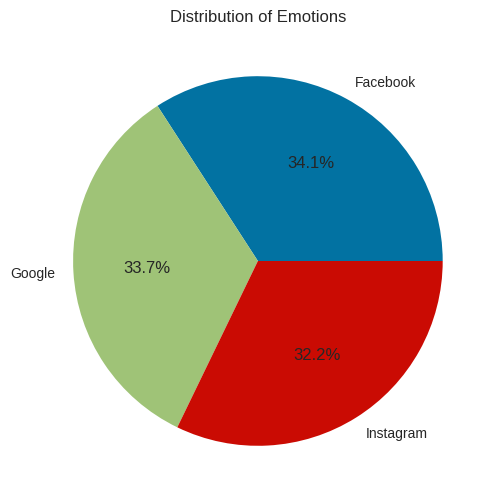

In [ ]:
counts = df['PublisherPlatform'].value_counts().head(10)
# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Emotions')
plt.show()

<Axes: >

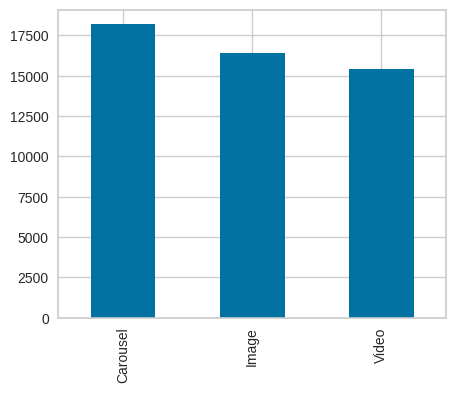

In [ ]:
plt.figure(figsize=(5, 4))
df['ContentType'].value_counts().plot(kind='bar')

<Axes: >

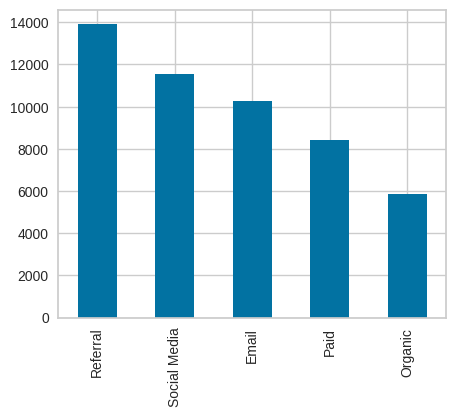

In [ ]:
plt.figure(figsize=(5, 4))
df['Channel'].value_counts().plot(kind='bar')

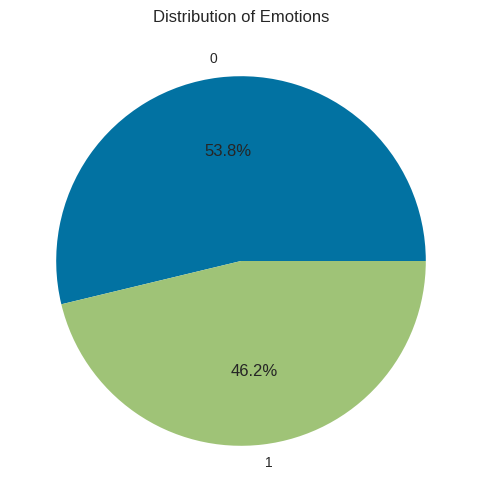

In [ ]:
counts = df['Clicked_on_Ad'].value_counts().head(10)
# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Emotions')
plt.show()

#### OBSERVATIONS

1. Ad displayed in Carousel is higher followed by image and videos as it suggest that people like to walkthrugh all informations of the AD's.

2. Advertisement displayed in Facebook is slightly higher compared to other social medias but all share nearly equal weightage.

3. People share mostly equal reactions in the emotions.

4. The Ad spread through Referral is high compared to social media which is notable, that shows how the people have been sharing taughts to other about the advertisement to their friends and colleagues.

5. Target variable (Clicked_on_Ad) is nearly a balanced data in which people how have impressed by the ad is 45%.


## Bivariate Analysis

<Axes: xlabel='Clicked_on_Ad', ylabel='count'>

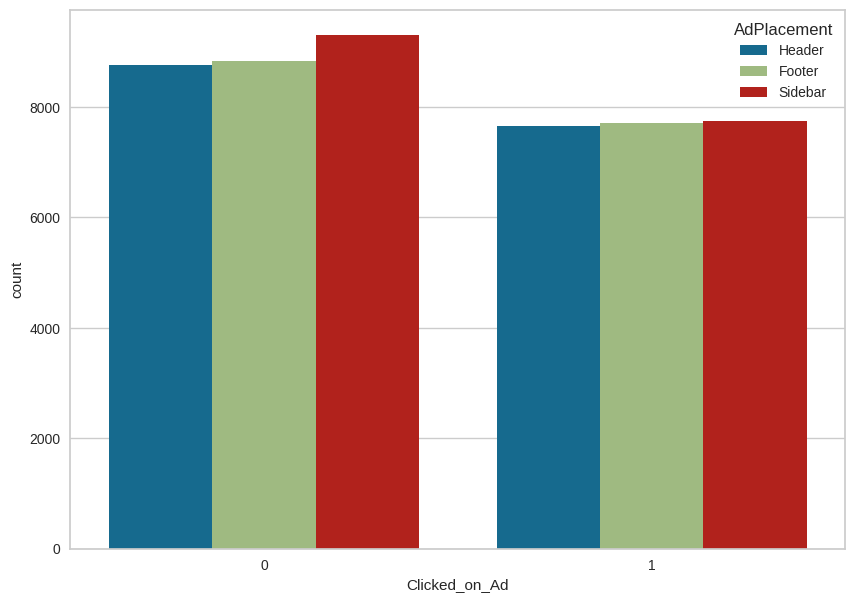

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(df,x='Clicked_on_Ad',hue='AdPlacement')

<Axes: xlabel='Clicked_on_Ad', ylabel='count'>

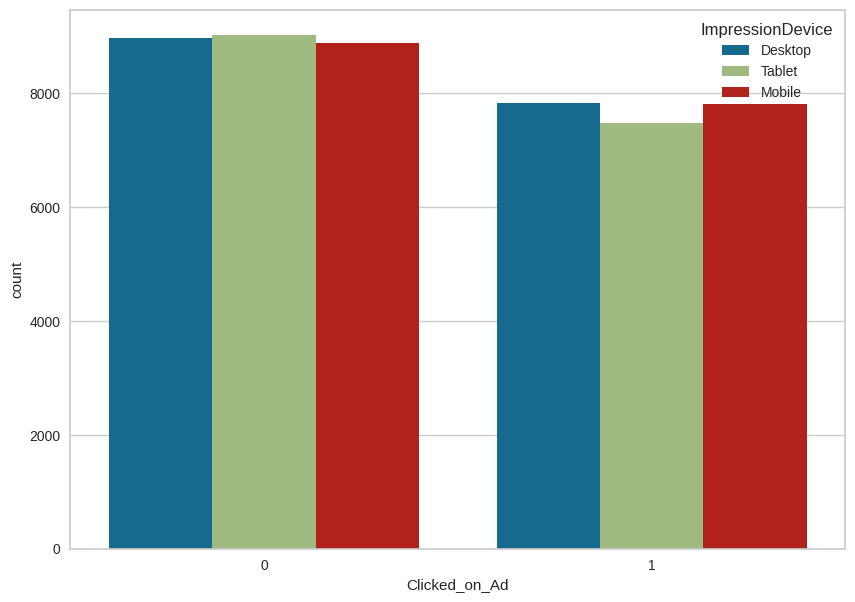

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(df,x='Clicked_on_Ad',hue='ImpressionDevice')

<Axes: xlabel='Clicked_on_Ad', ylabel='count'>

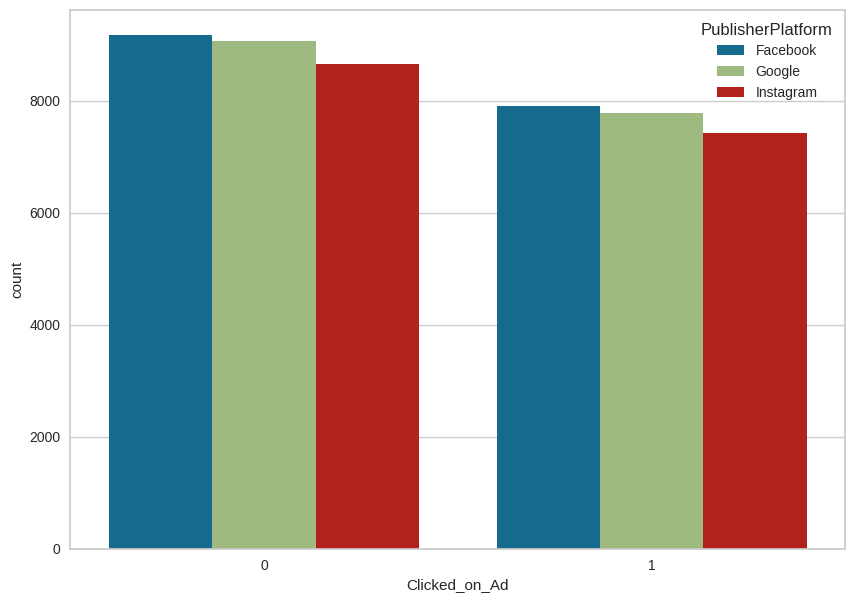

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(df,x='Clicked_on_Ad',hue='PublisherPlatform')

<Axes: xlabel='Clicked_on_Ad', ylabel='count'>

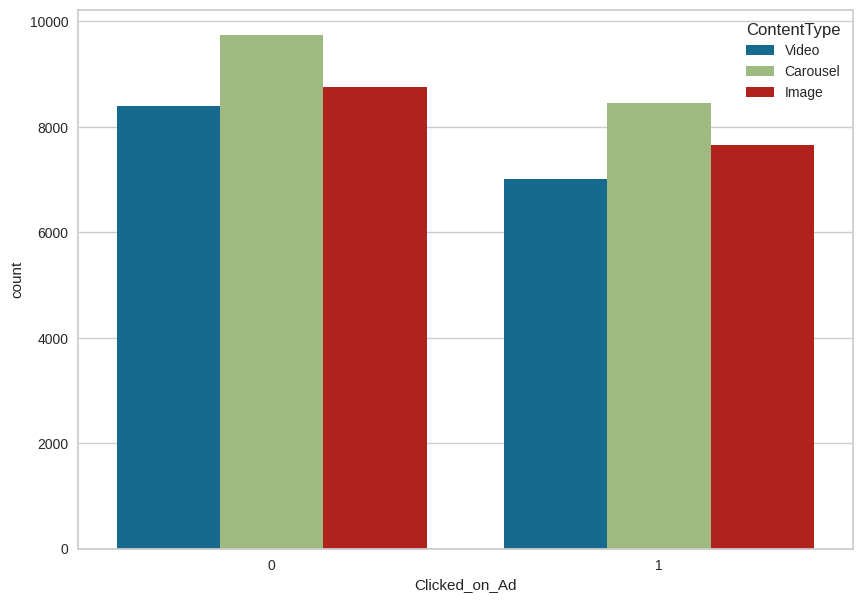

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(df,x='Clicked_on_Ad',hue='ContentType')

<Axes: xlabel='Clicked_on_Ad', ylabel='count'>

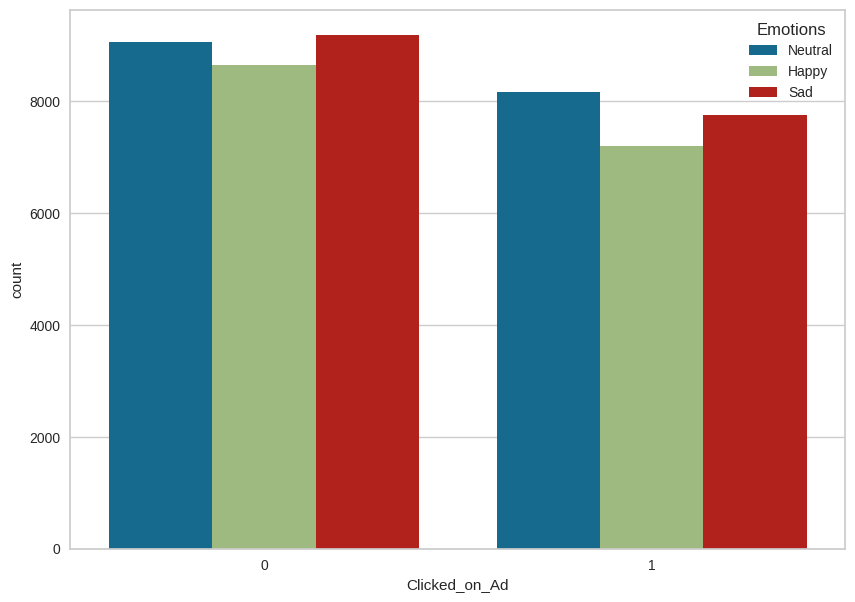

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(df,x='Clicked_on_Ad',hue='Emotions')

<Axes: xlabel='Clicked_on_Ad', ylabel='count'>

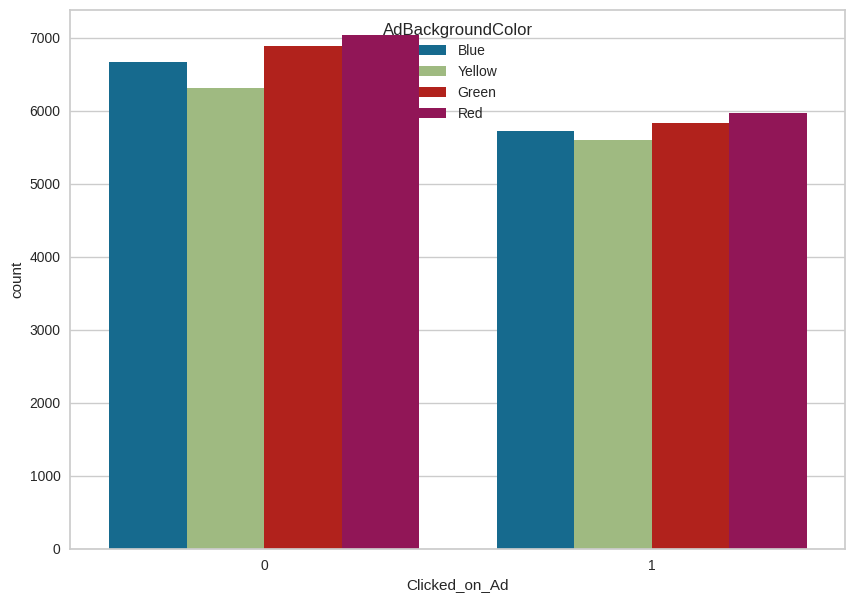

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(df,x='Clicked_on_Ad',hue='AdBackgroundColor')

<Axes: xlabel='Clicked_on_Ad', ylabel='count'>

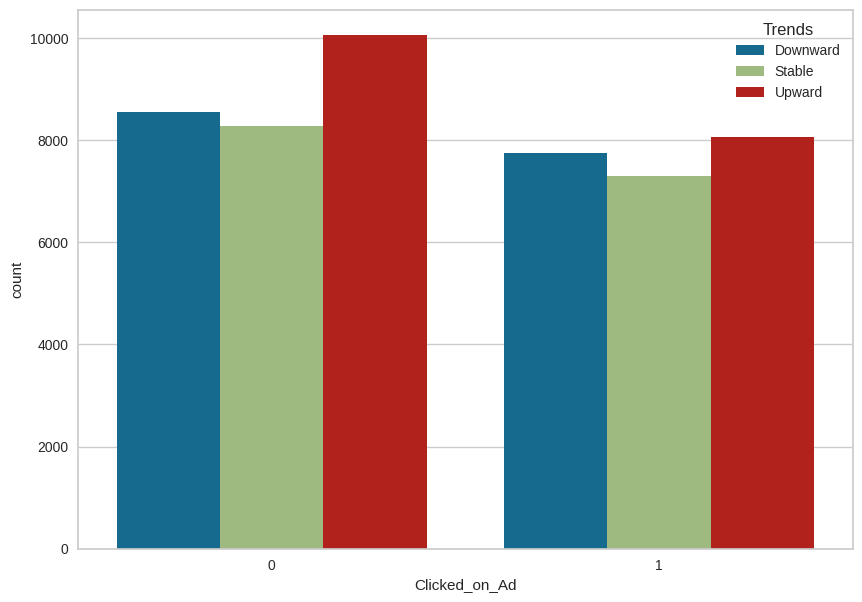

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(df,x='Clicked_on_Ad',hue='Trends')

<Axes: xlabel='Clicked_on_Ad', ylabel='count'>

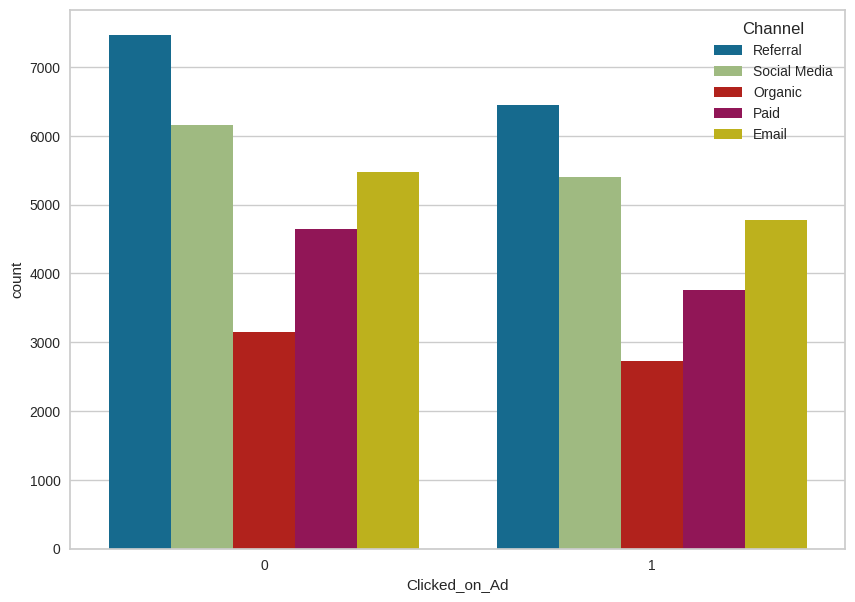

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(df,x='Clicked_on_Ad',hue='Channel')

#### OBSERVATIONS

1. People who have seen Carousel has clicked on the AD more followed by Images and Videos
2. Emotional reactions of the people feeling about the Ad's is slightly balaned between themselves, but the people who responded to the AD feels slightly SAD when compared to neutral which is notable and should be taken under the consideration , which is based on the type of AD that is advertised.
3. People feel more attracted to green and red color of the AD that has displayed because red is the color most associated with love,courage and confident , and the color green means nature and they feel more natural toward the AD.
4. The channel through the AD got popular was Refferal followed by social media and email.

****Click-Through Rates (CTR) Analysis:****
    
CTR is a metric for measuring the total number of clicks that an advertiser receives on their posted ads on a per number of impressions basis. It is a measure of showing how many people click your ad out of the people who click on it.

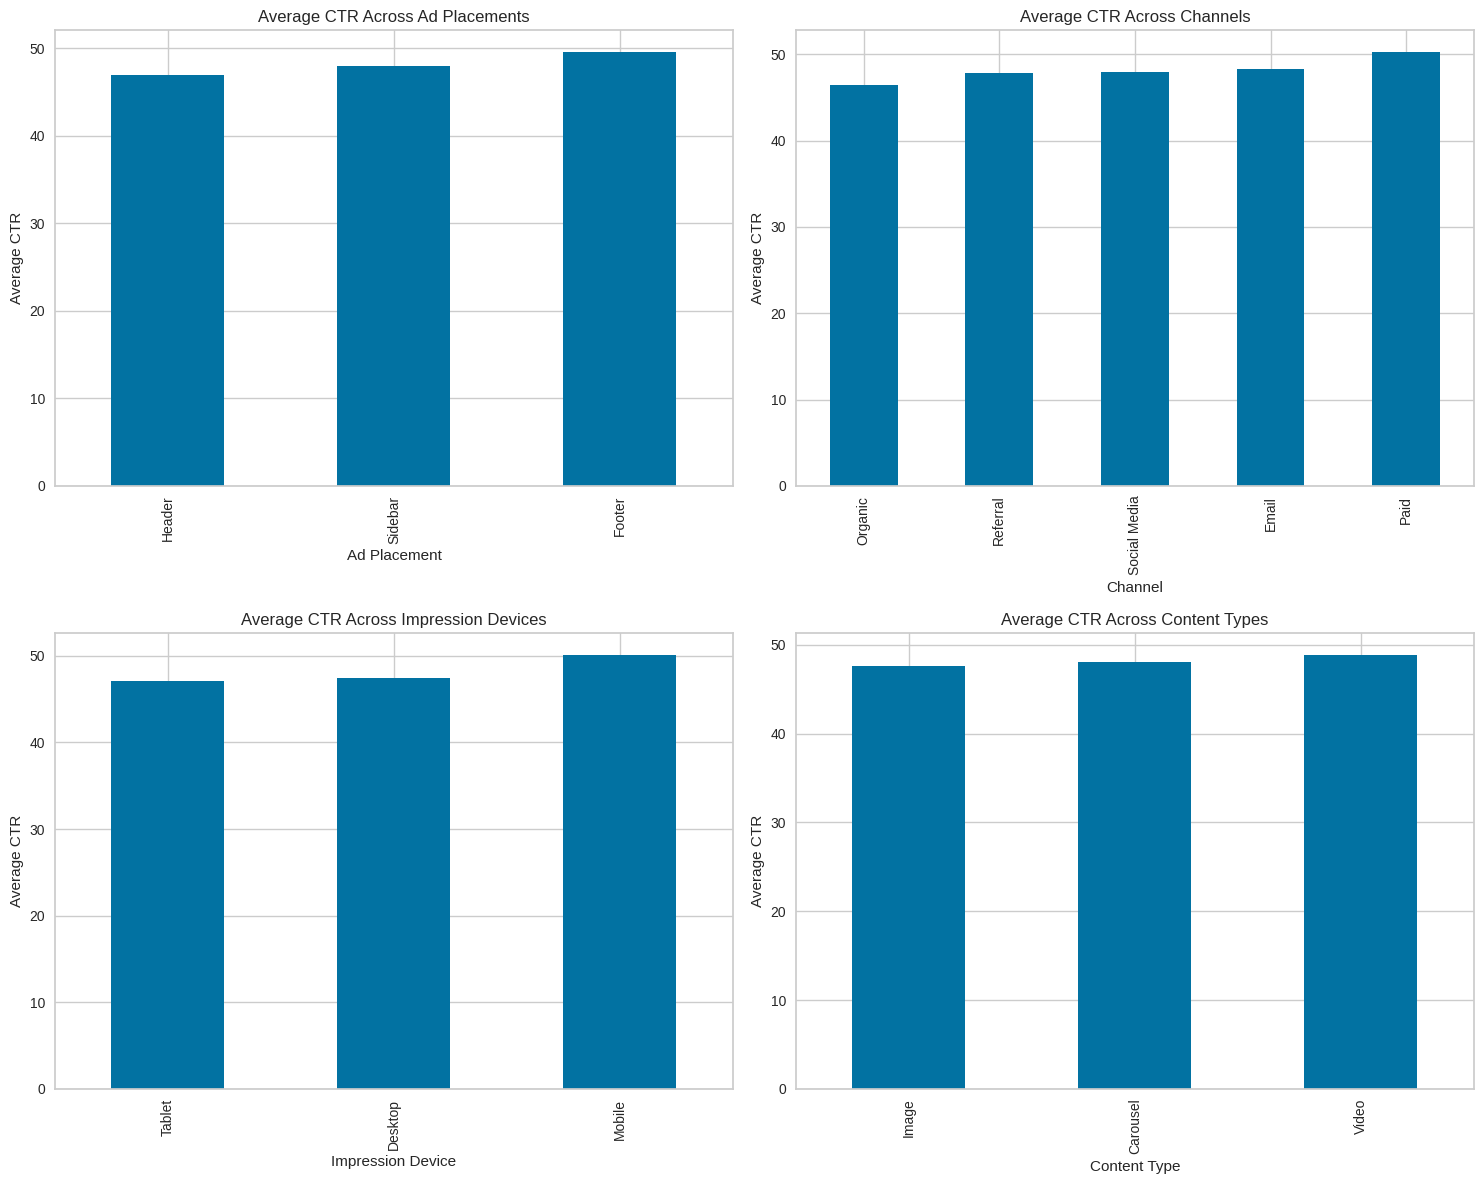

In [ ]:

# Visualizing CTR across different segments
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# CTR across ad placements
ax1 = axes[0, 0]
df.groupby('AdPlacement')['CTR'].mean().sort_values().plot(kind='bar', ax=ax1)
ax1.set_title('Average CTR Across Ad Placements')
ax1.set_xlabel('Ad Placement')
ax1.set_ylabel('Average CTR')

# CTR across channels
ax2 = axes[0, 1]
df.groupby('Channel')['CTR'].mean().sort_values().plot(kind='bar', ax=ax2)
ax2.set_title('Average CTR Across Channels')
ax2.set_xlabel('Channel')
ax2.set_ylabel('Average CTR')

# CTR across impression devices
ax3 = axes[1, 0]
df.groupby('ImpressionDevice')['CTR'].mean().sort_values().plot(kind='bar', ax=ax3)
ax3.set_title('Average CTR Across Impression Devices')
ax3.set_xlabel('Impression Device')
ax3.set_ylabel('Average CTR')

# CTR across content types
ax4 = axes[1, 1]
df.groupby('ContentType')['CTR'].mean().sort_values().plot(kind='bar', ax=ax4)
ax4.set_title('Average CTR Across Content Types')
ax4.set_xlabel('Content Type')
ax4.set_ylabel('Average CTR')

plt.tight_layout()
plt.show()


<Axes: xlabel='PublisherPlatform', ylabel='CTR'>

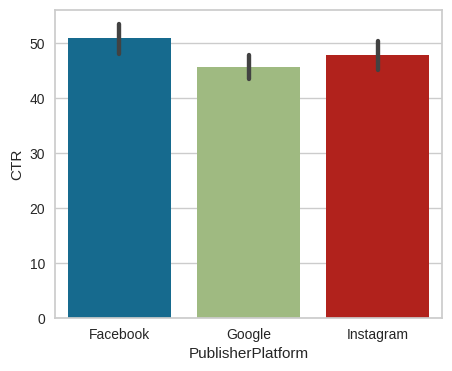

In [ ]:
plt.figure(figsize=(5, 4))
sns.barplot(df,x='PublisherPlatform',y='CTR')

#### OBSERVATIONS

1. Average CTR has more response when AD is placed in footer,mobile
2. Average CTR has more response when AD is advertised for Paid members
3. All the social media platform in which our AD got advertised has been effective.

## Engagement Metrics:
Explore how engagement metrics (likes, shares, comments) vary for different categories of a categorical variable. This can provide insights into which categories result in more audience interaction.

<Axes: xlabel='AdPlacement', ylabel='Likes'>

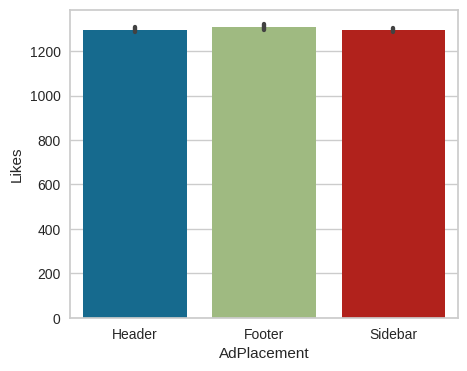

In [ ]:
plt.figure(figsize=(5, 4))
sns.barplot(df,x='AdPlacement',y='Likes')

<Axes: xlabel='AdBackgroundColor', ylabel='Likes'>

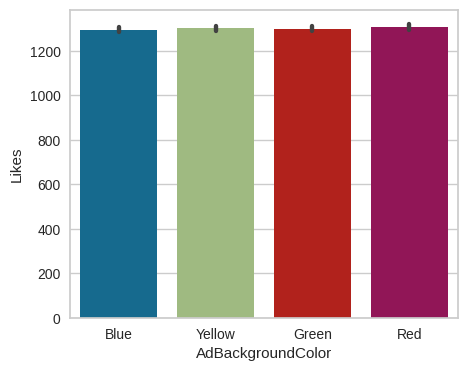

In [ ]:
plt.figure(figsize=(5, 4))
sns.barplot(df,x='AdBackgroundColor',y='Likes')

<Axes: xlabel='ImpressionDevice', ylabel='Likes'>

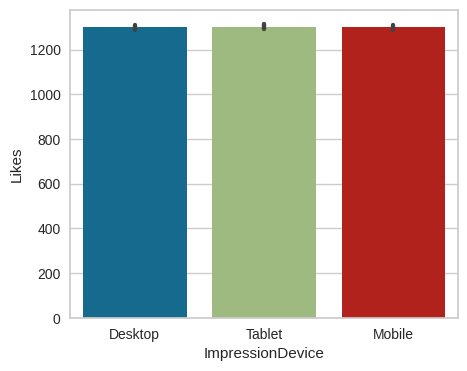

In [ ]:
plt.figure(figsize=(5, 4))
sns.barplot(df,x='ImpressionDevice',y='Likes')

<Axes: xlabel='ContentType', ylabel='Likes'>

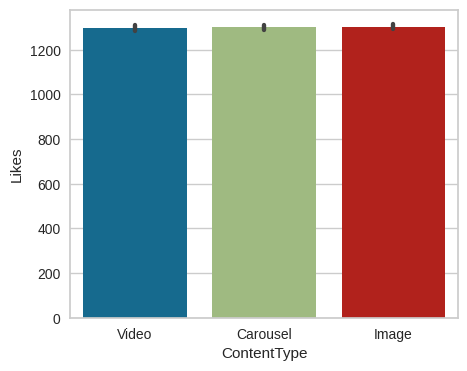

In [ ]:
plt.figure(figsize=(5, 4))
sns.barplot(df,x='ContentType',y='Likes')

<Axes: xlabel='Channel', ylabel='Likes'>

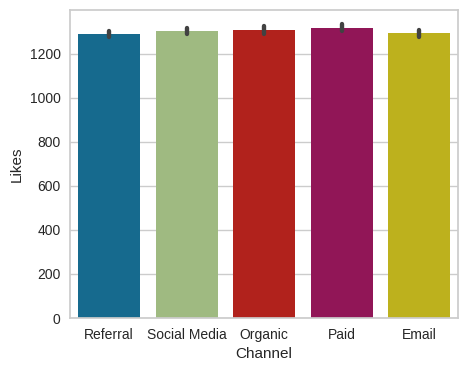

In [ ]:
plt.figure(figsize=(5, 4))
sns.barplot(df,x='Channel',y='Likes')

#### OBSERVATIONS:

1. Ad placed in the website has been spot on as all the Ad placement,channel,content type, impression device and Ad background color have received a greater and equal amout of responses, thats shows how effective the AD has been to reach the audience.

## Budget Allocation:

<Axes: xlabel='Clicked_on_Ad', ylabel='Daily_Budget'>

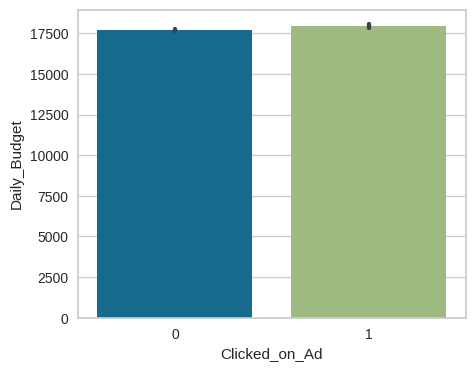

In [ ]:
plt.figure(figsize=(5, 4))
sns.barplot(df,x='Clicked_on_Ad',y='Daily_Budget')

<Axes: xlabel='Clicked_on_Ad', ylabel='Daily_Internet_Usage'>

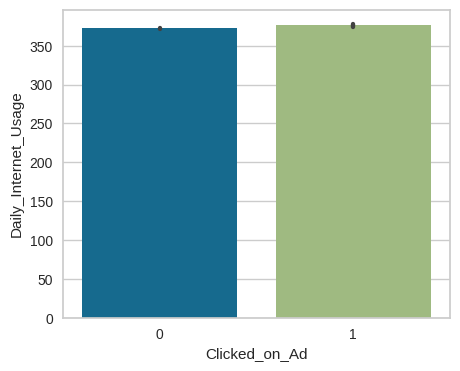

In [ ]:
plt.figure(figsize=(5, 4))
sns.barplot(df,x='Clicked_on_Ad',y='Daily_Internet_Usage')

<Axes: xlabel='Clicked_on_Ad', ylabel='Daily_Time_Spent_on_Platform'>

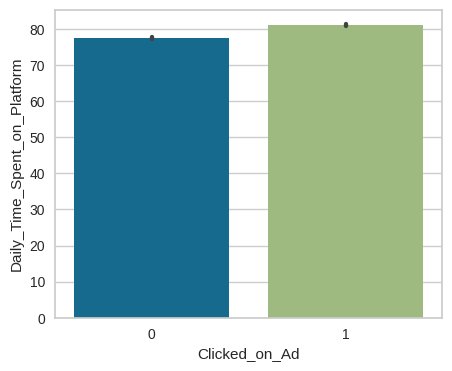

In [ ]:
plt.figure(figsize=(5, 4))
sns.barplot(df,x='Clicked_on_Ad',y='Daily_Time_Spent_on_Platform')

<Axes: xlabel='Clicked_on_Ad', ylabel='Video_Duration_In_Seconds'>

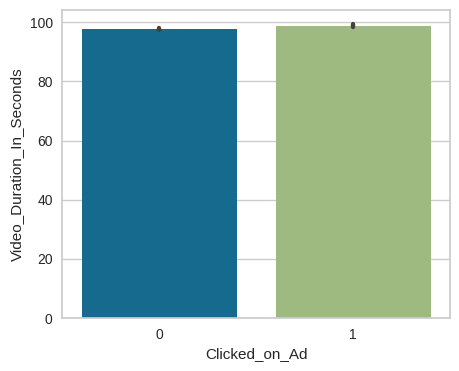

In [ ]:
plt.figure(figsize=(5, 4))
sns.barplot(df,x='Clicked_on_Ad',y='Video_Duration_In_Seconds')

<Axes: xlabel='Clicked_on_Ad', ylabel='Impressions'>

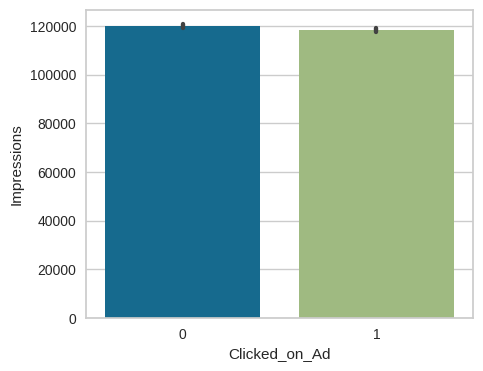

In [ ]:
plt.figure(figsize=(5, 4))
sns.barplot(df,x='Clicked_on_Ad',y='Impressions')

In [ ]:
px.scatter(df,x='CTR',y='Likes')

In [ ]:
px.scatter(df,x='CTR',y='Impressions')

<Axes: xlabel='Clicked_on_Ad', ylabel='count'>

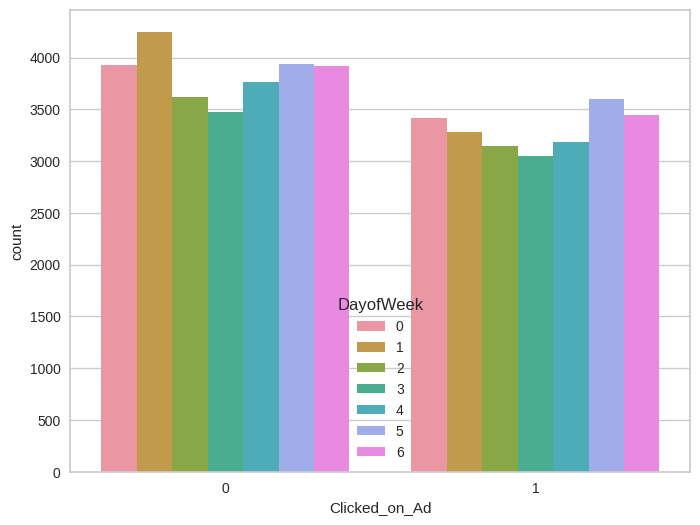

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(df,x='Clicked_on_Ad',hue='DayofWeek')

<Axes: xlabel='Clicked_on_Ad', ylabel='count'>

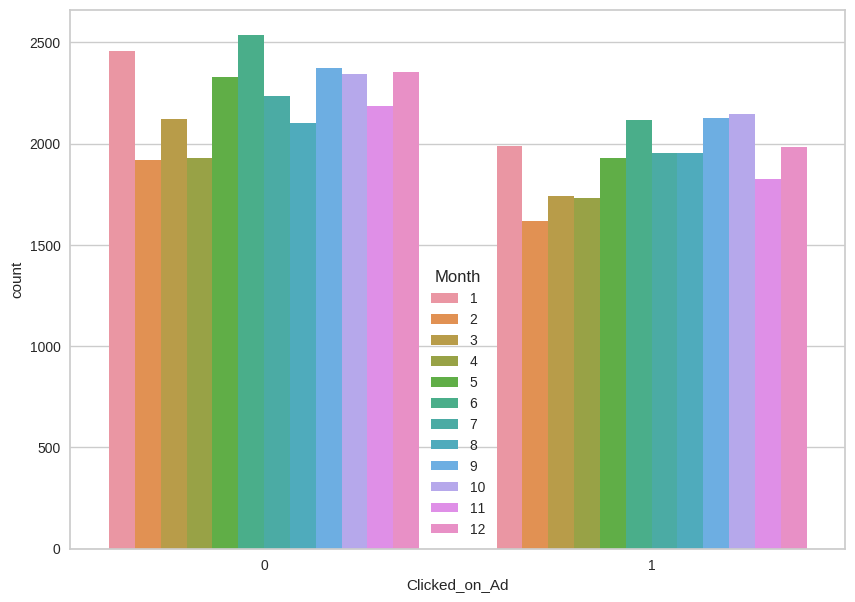

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(df,x='Clicked_on_Ad',hue='Month')

#### Observations

1. Peoples engagement on the AD based on the budget has received slightly dissappinted results which canbe of various factors based on how,when and where the Ad has be advertised and also on how the Ad has been designed, which eventually help us to discuss how more and effectively the budget can be allocated on which factor and to revise the strategy which can lead for healthy reaction from people.Since both have equal weightage of clicks.
2. The  Click-Through Rate(CTR) that ranges around from 0 to 500 has received more like compared to higher CTR ranges, enabling us to concentrate more on the 1300 range and also suggests us to revise the plan that has been executed in higher range enabling to effectively capture higher range in future.
3. All the social media platform in which our AD got advertised has been effective.(Social media AD is strong plus)
4. It is also applicable for impression in the range of 0 to 300.
5. Friday and Saturday(people will bwe relaxed after the Friday's work and be most likely liked our Ad) are most important days to be noticed as where our Ad's has got more responses and also impressed them.
6. February,March,April month has recorded qiute a low responses from people, so changing the Ad advertised on april month can give us much more responses as April is also associated with springtime, new beginnings, and a time to bloom introducing some advertisement on home product or garden can increase the response.Alternatively the Ad displayed on jube has a greater response so introducing simliar Ad will give more much more response and user interactions.

****Analyze the performance of each channel****

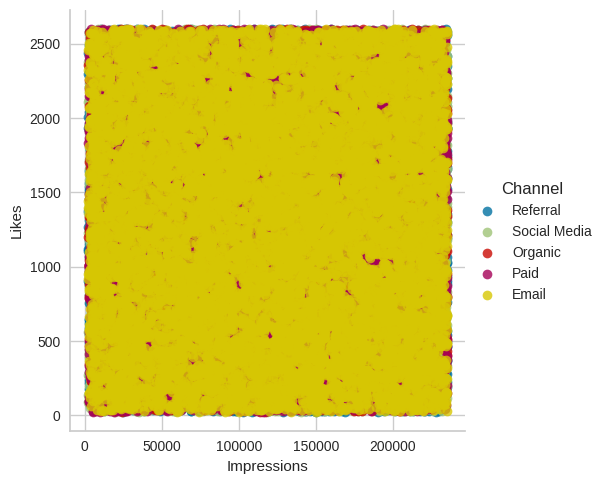

In [ ]:
#checking impressions and click with channel distributions
sns.lmplot(x = "Impressions", y = "Likes", data = df, fit_reg=False, hue='Channel')
plt.show()

****Date wise distribution of Ad clicks****

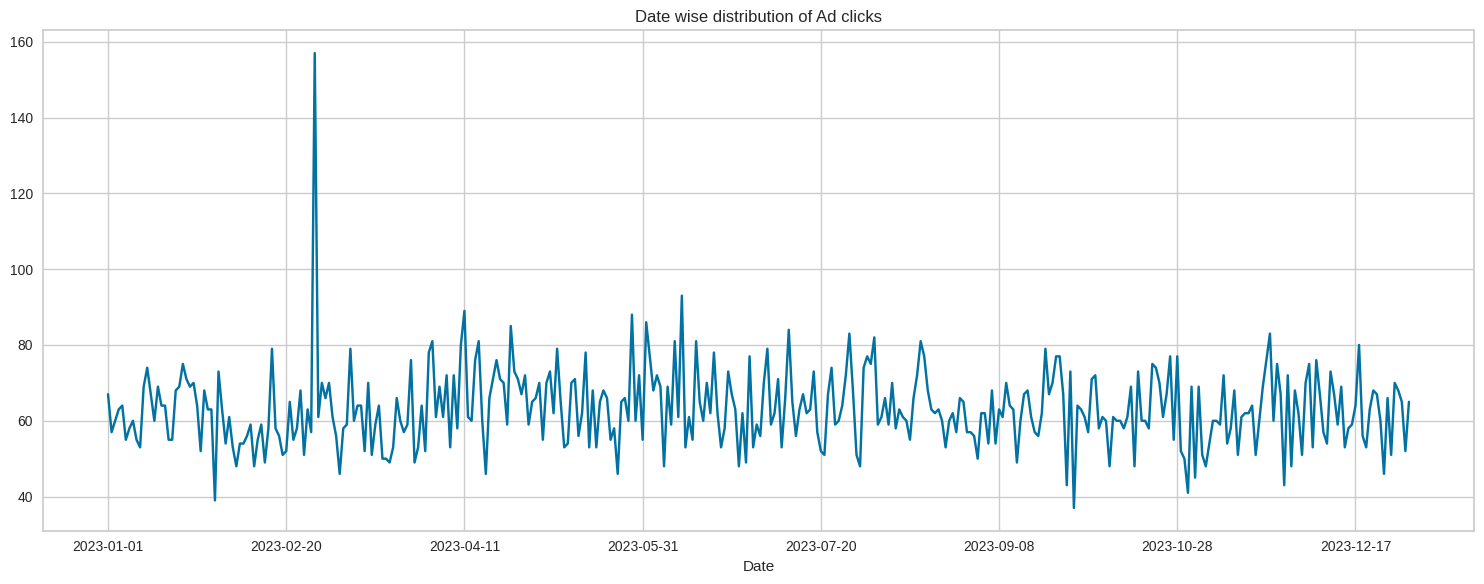

In [ ]:
plt.figure(figsize=(15,6))
df[df['Clicked_on_Ad']==1].groupby('Date').count()['Clicked_on_Ad'].plot()
plt.title('Date wise distribution of Ad clicks')
plt.tight_layout()


****Audience Targeting:****
    Analyze how different demographics (age, gender) respond to various ad formats and platforms to optimize targeting strategies.

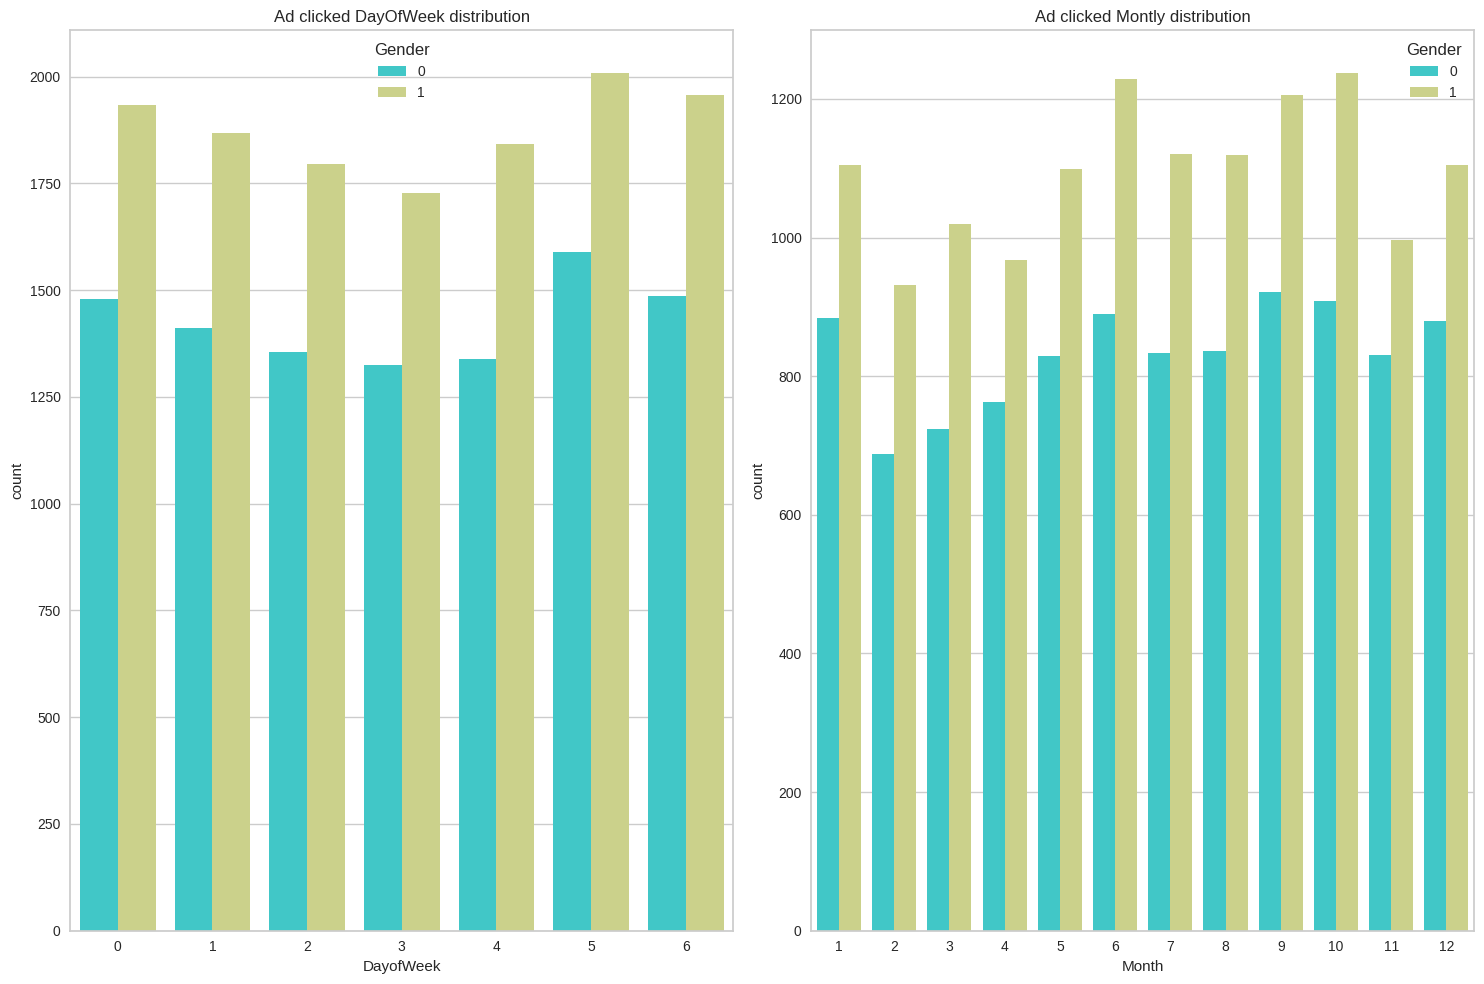

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Create subplots for each metric
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
sns.countplot(x='DayofWeek',data=df[df['Clicked_on_Ad']==1],hue='Gender',ax=ax1,palette='rainbow')
ax1.set_title('Ad clicked DayOfWeek distribution')
sns.countplot(x='Month',data=df[df['Clicked_on_Ad']==1],hue='Gender',ax=ax2,palette='rainbow')
ax2.set_title('Ad clicked Montly distribution')
plt.tight_layout()
plt.show()


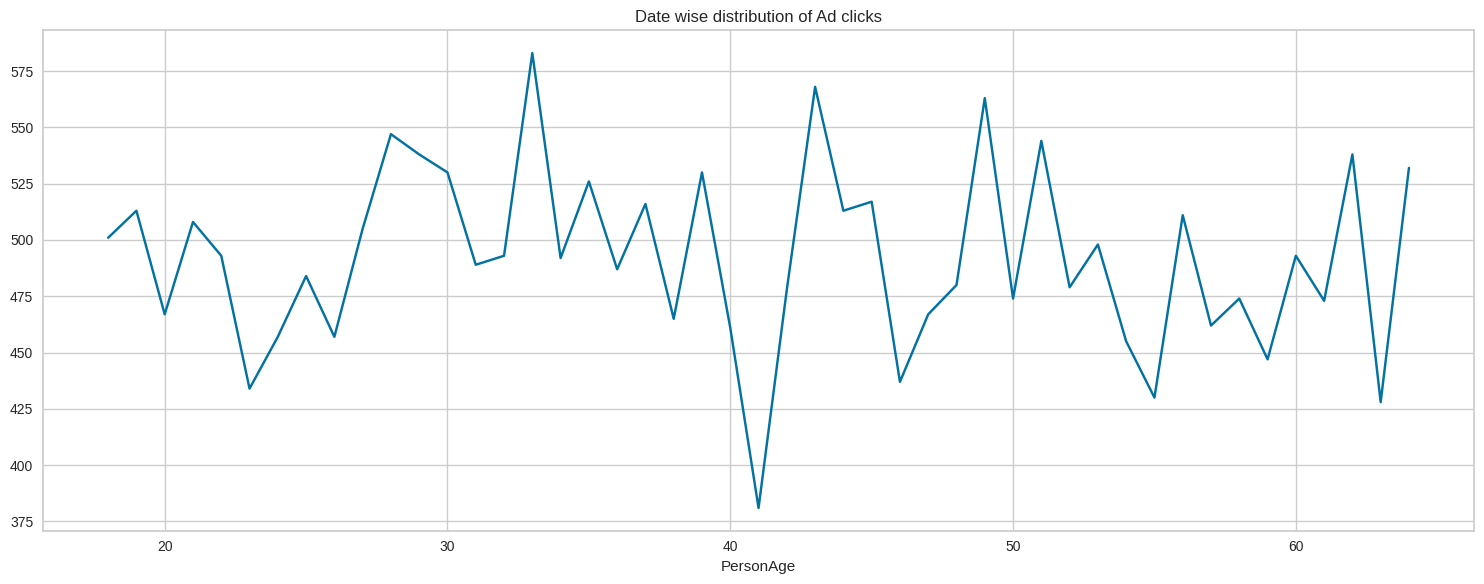

In [ ]:
plt.figure(figsize=(15,6))
df[df['Clicked_on_Ad']==1].groupby('PersonAge').count()['Clicked_on_Ad'].plot()
plt.title('Date wise distribution of Ad clicks')
plt.tight_layout()


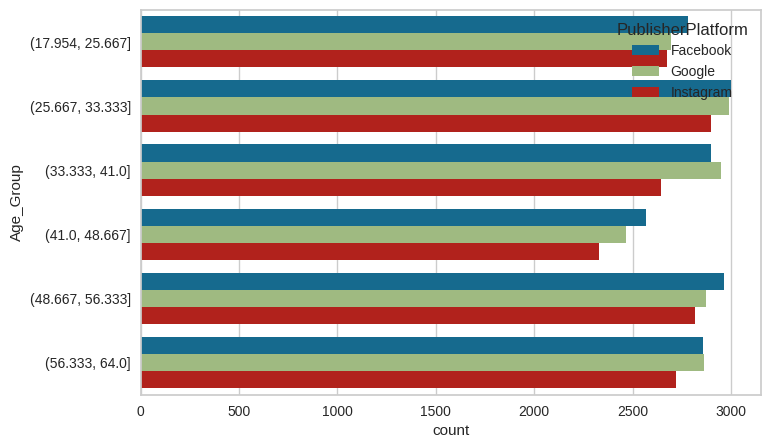

In [ ]:
plt.figure(figsize=(8, 5))
df['Age_Group'] = pd.cut(df['PersonAge'], bins=6)
sns.countplot(hue=df["PublisherPlatform"], y=df["Age_Group"], data=df)
plt.show()

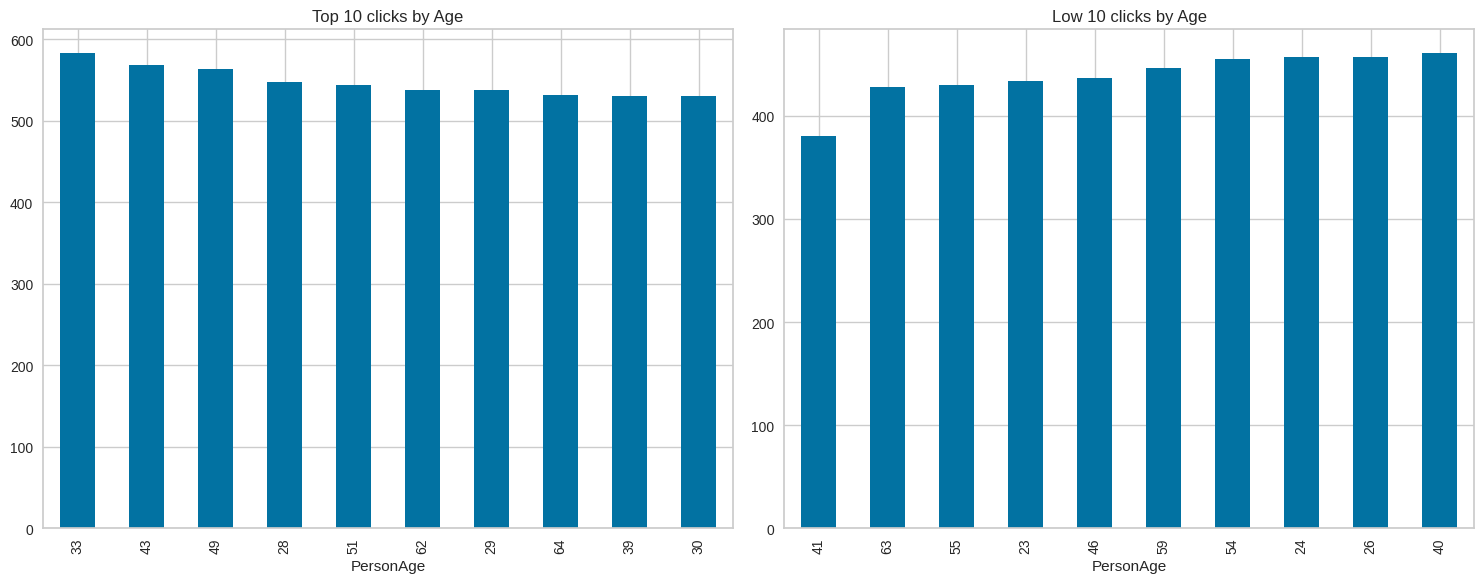

In [ ]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
df[df['Clicked_on_Ad']==1].groupby('PersonAge').count()['Clicked_on_Ad'].sort_values(ascending=False).head(10).plot(kind='bar',ax=ax1)
ax1.set_title('Top 10 clicks by Age')
df[df['Clicked_on_Ad']==1].groupby('PersonAge').count()['Clicked_on_Ad'].sort_values(ascending=True).head(10).plot(kind='bar',ax=ax2)
ax2.set_title('Low 10 clicks by Age')
plt.tight_layout()
plt.show()


****Seasonal Trends and Events:****
    
Explore how seasonal variations or external events impact ad performance and suggest strategies to capitalize on these trends
Metrics Trends Over Time: Plot the performance metrics (CTR, Impressions, Engagement) against time (months or specific dates) to observe trends and fluctuations.
Identify Seasonal Patterns: Detect any recurring patterns or seasonal spikes in performance metrics

<ipython-input-393-3c78cf8ca079>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



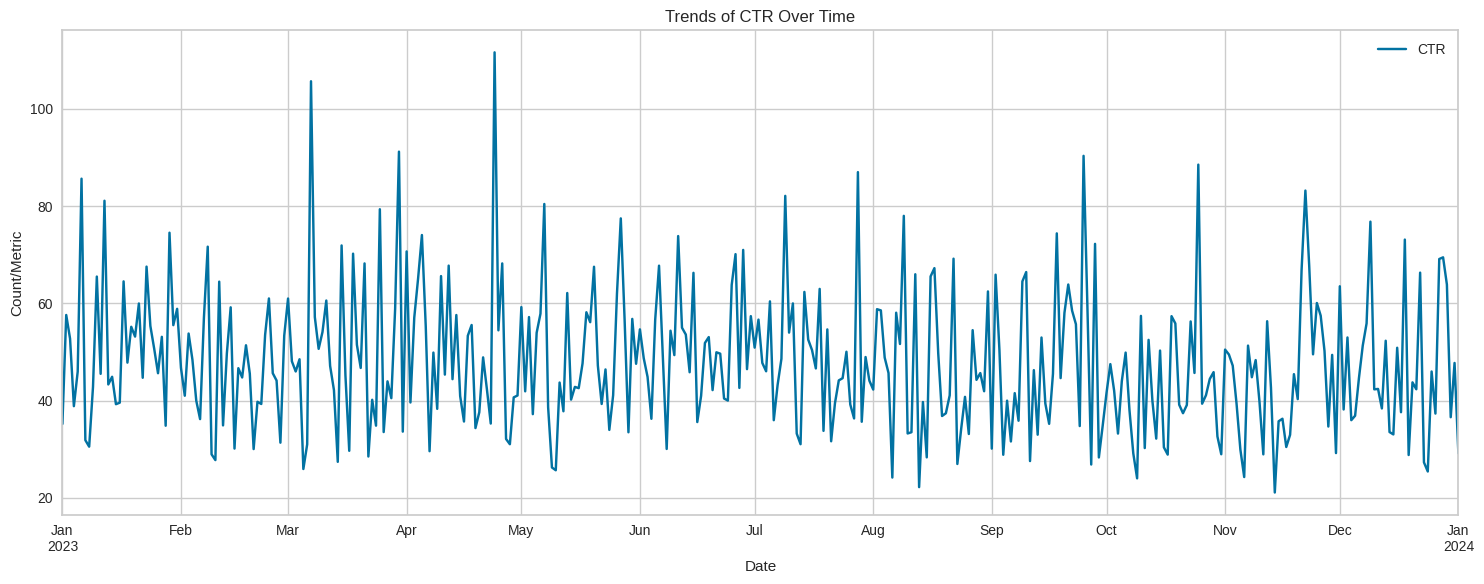

In [ ]:
plt.figure(figsize=(15,6))
df.groupby('Date').mean()['CTR'].plot()
plt.title('Trends of CTR Over Time')
plt.xlabel('Date')
plt.ylabel('Count/Metric')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-394-628193c9e83a>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



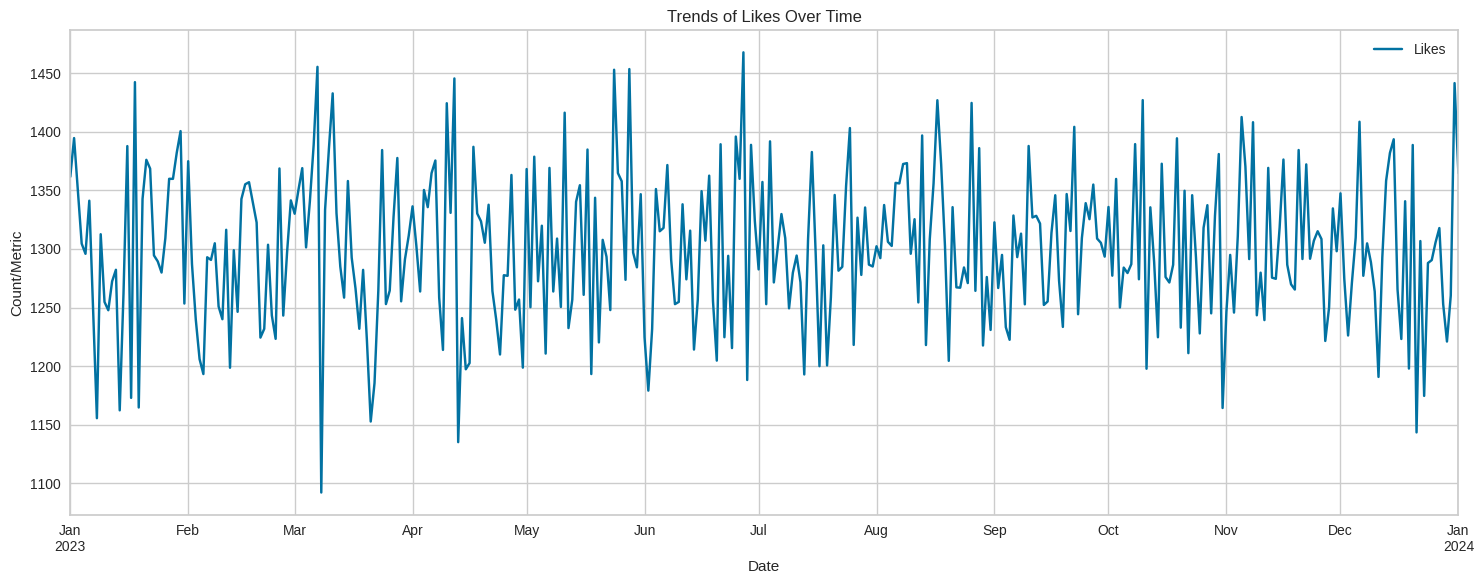

In [ ]:
plt.figure(figsize=(15,6))
df.groupby('Date').mean()['Likes'].plot()
plt.title('Trends of Likes Over Time')
plt.xlabel('Date')
plt.ylabel('Count/Metric')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-395-748fa741ef54>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



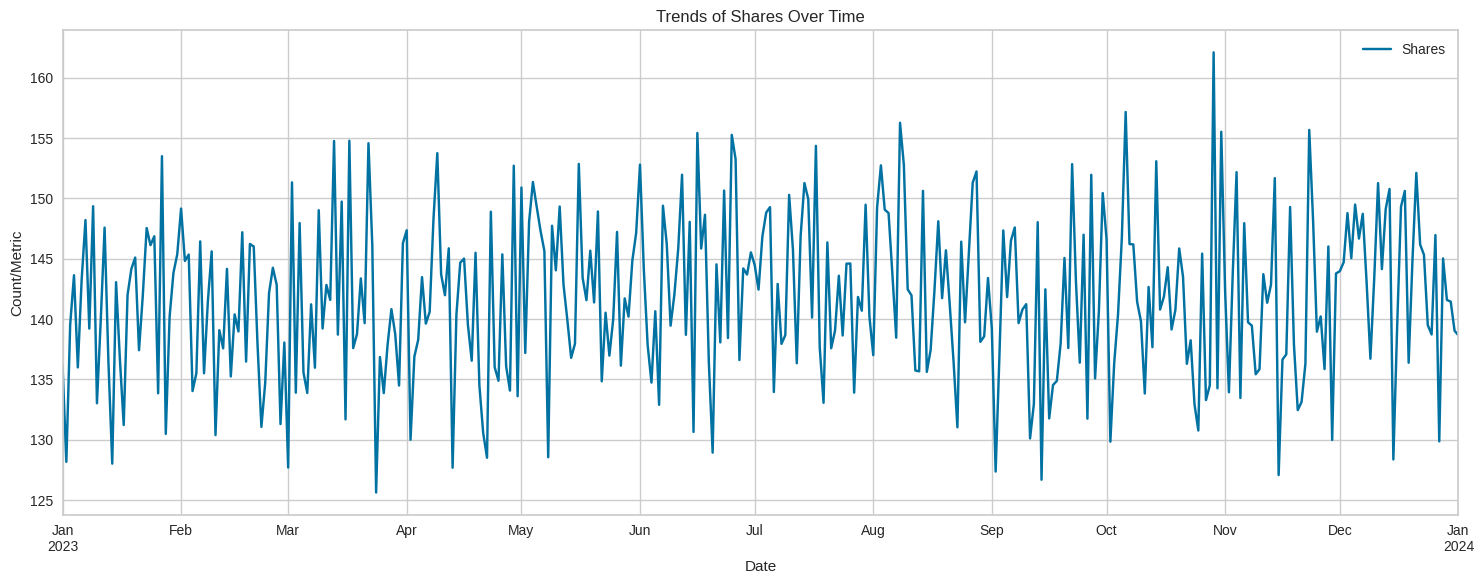

In [ ]:
plt.figure(figsize=(15,6))
df.groupby('Date').mean()['Shares'].plot()
plt.title('Trends of Shares Over Time')
plt.xlabel('Date')
plt.ylabel('Count/Metric')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-396-26b4f676f058>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



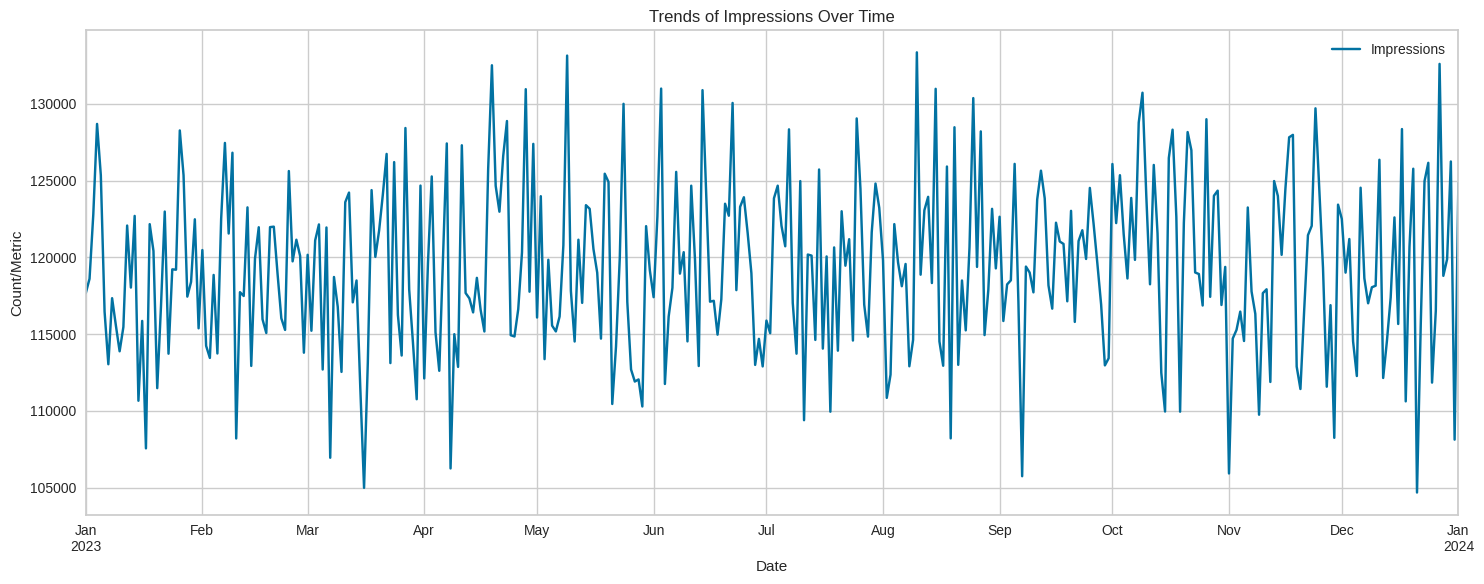

In [ ]:
plt.figure(figsize=(15,6))
df.groupby('Date').mean()['Impressions'].plot()
plt.title('Trends of Impressions Over Time')
plt.xlabel('Date')
plt.ylabel('Count/Metric')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

****Insights****

The non-linear patterns observed between dates and CTR at the time of events might suggest that certain external events have a significant impact on CTR. The peaks or fluctuations around these events indicate that these occurrences might influence user behavior, positively or negatively affecting CTR.
Non-linearity in the CTR over time might also indicate recurring patterns or seasonality.
Investigate each event to determine its specific impact on CTR. Assess whether there is a consistent rise or fall in CTR around certain types of events or if the impact varies.

Seasonal Decomposition: Use techniques like seasonal decomposition of time series to separate seasonal effects, trend, and
    residual components. This analysis can help isolate the effects of external events from underlying seasonal trends.

Explore correlations between events, CTR, and other variables (such as ad formats or audience segments) to identify any causal relationships or influencing factors.

1. There was more likes in the start of march month   

2. Male audience has more number of interaction to our Ad's which also suggest us to introduce AD's female related producs to cover more audience

3. People from the age of 30 to 50 has more interation to the AD

    

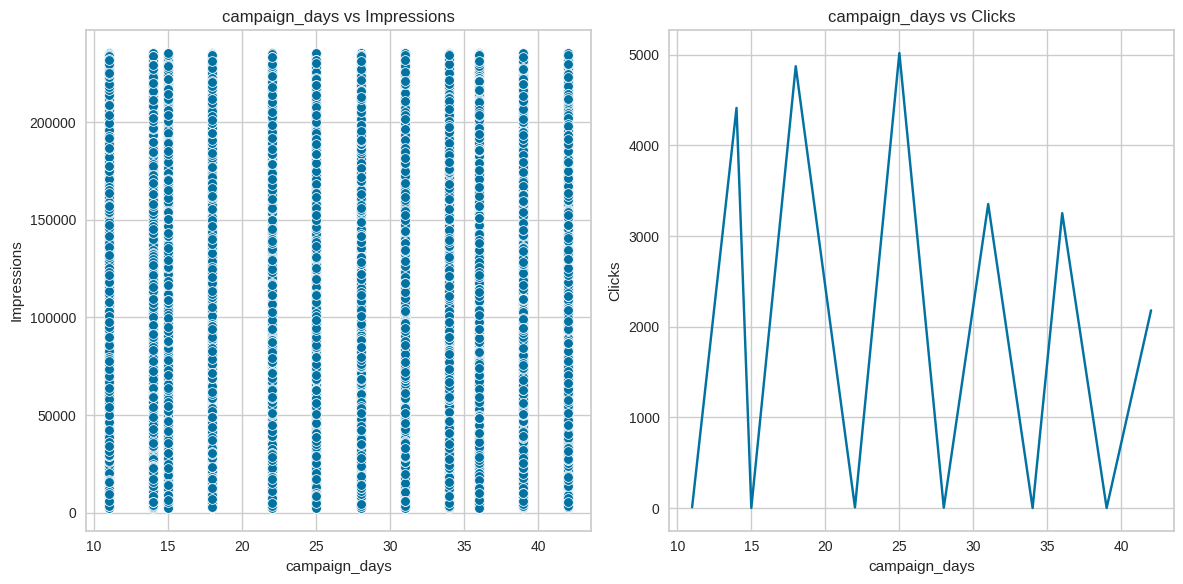

In [ ]:
# checking scatter plots for campaign_days v/s impressions

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot: no_of_days vs impressions
sns.scatterplot(data=df, x="campaign_days", y="Impressions", ax=axes[0])
axes[0].set_xlabel("campaign_days")
axes[0].set_ylabel("Impressions")
axes[0].set_title("campaign_days vs Impressions")

# campaign_days vs clicks
df[df['Clicked_on_Ad']==1].groupby('campaign_days').count()['Clicked_on_Ad'].plot(ax=axes[1])
axes[1].set_xlabel("campaign_days")
axes[1].set_ylabel("Clicks")
axes[1].set_title("campaign_days vs Clicks")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()
#Insights -No of clicks and impressions have decreased over the period of time

In [ ]:
fig = px.box(df,
             x="Daily_Time_Spent_on_Platform",
             color="Clicked_on_Ad",
             title="Click Through Rate based on Time Spent on Platform",
             color_discrete_map={'Yes':'blue',
                                 'No':'red'})
fig.update_traces(quartilemethod="exclusive")
fig.show()
#CTR vs. Time spent
#People seem to be more inclined to click on advertisements the longer they stay on internet pages. Second, we conducted an analysis to find out whether a user’s daily internet usage affects CTR.

In [ ]:
fig = px.box(df,
             x="Daily_Internet_Usage",
             color="Clicked_on_Ad",
             title="Click Through Rate based on Daily_Internet_Usage",
             color_discrete_map={'Yes':'blue',
                                 'No':'red'})
fig.update_traces(quartilemethod="exclusive")
fig.show()
#CTR vs Daily internet usage
#Based on the graph, more daily internet users will click ads more often. Next, we analyze whether the user’s age has an effect on the click-through rate.

****Evaluate whether higher spenders tend to achieve higher Conversion Rates compared to lower spenders****

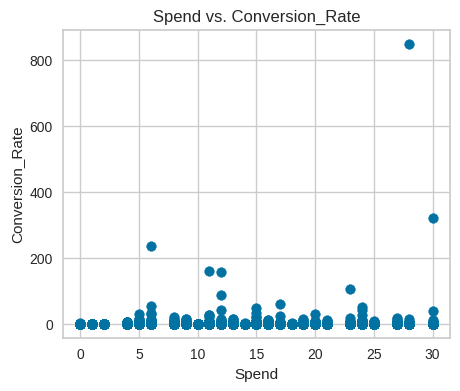

In [ ]:
#We can say, as the amount of money spent increases, Conversion_Rate increases but here there is no correlation.
plt.figure(figsize=(5, 4))
plt.scatter(df["Spend"], df["Conversion_Rate"])
plt.title("Spend vs. Conversion_Rate")
plt.xlabel("Spend")
plt.ylabel("Conversion_Rate")
plt.show()

****High-performing and low-performing products****

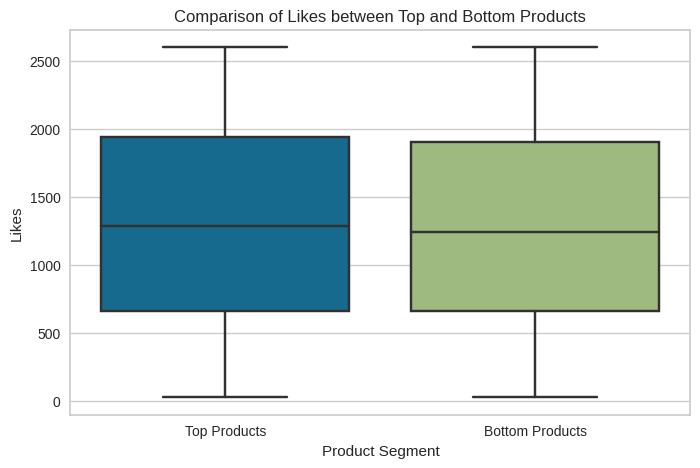

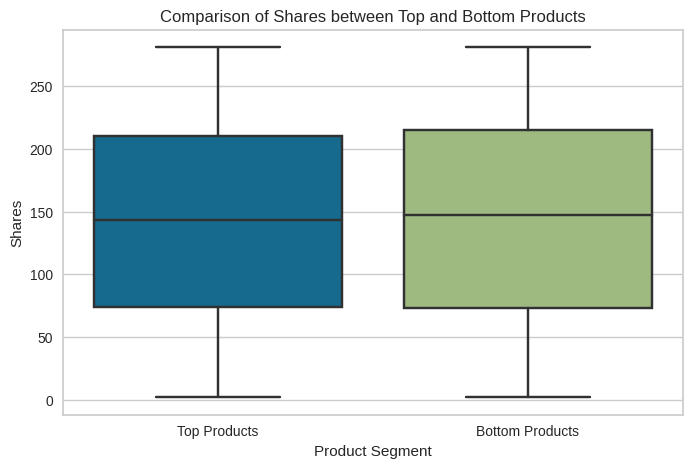

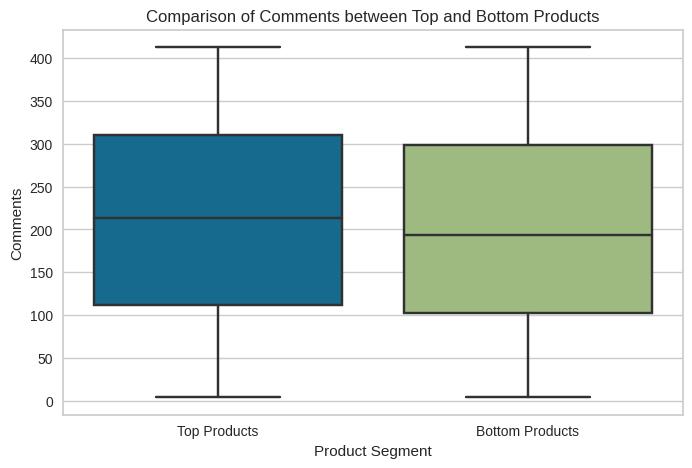

In [ ]:
# Compute total engagement metric (sum of likes, shares, comments) for each product
df['Total Engagement'] = df['Likes'] + df['Shares'] + df['Comments']  # Add other engagement metrics if needed

# Grouping data by 'Product ID' and calculating total engagement
product_engagement = df.groupby('product_id')['Total Engagement'].sum().reset_index()

# Sorting products by total engagement in descending order
sorted_products = product_engagement.sort_values(by='Total Engagement', ascending=False)

# Divide products into top-ranked (high-performing) and bottom-ranked (low-performing)
top_products = sorted_products.head(10)  # Assuming top 10 products
bottom_products = sorted_products.tail(10)  # Assuming bottom 10 products

# Filter original DataFrame for top and bottom products' details
top_df = df[df['product_id'].isin(top_products['product_id'])]
bottom_df = df[df['product_id'].isin(bottom_products['product_id'])]

# Comparison of engagement metrics between top and bottom products
engagement_metrics = ['Likes', 'Shares', 'Comments']  # List of engagement metrics to compare

for metric in engagement_metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=[top_df[metric], bottom_df[metric]])
    plt.title(f'Comparison of {metric} between Top and Bottom Products')
    plt.xlabel('Product Segment')
    plt.ylabel(metric)
    plt.xticks([0, 1], ['Top Products', 'Bottom Products'])
    plt.show()


****Insights****

Similar Engagement Patterns: The near-identical box plots indicate that the distribution of engagement metrics (likes, shares, comments) for both top and bottom products exhibits similar patterns. There is no clear distinction in how these metrics are distributed between the two segments.

Consistent Engagement Behavior: It implies that users' engagement behavior (in terms of likes, shares, and comments) with both top and bottom products follows a similar trend. This similarity could suggest that certain factors influencing engagement, at least those captured by these metrics, might be consistent across products regardless of their performance levels.

No Discriminating Metric: In this context, if likes, shares, and comments exhibit similar distributions across top and bottom products, it might indicate that these metrics, individually, may not be the decisive factors in differentiating between high-performing and low-performing products.

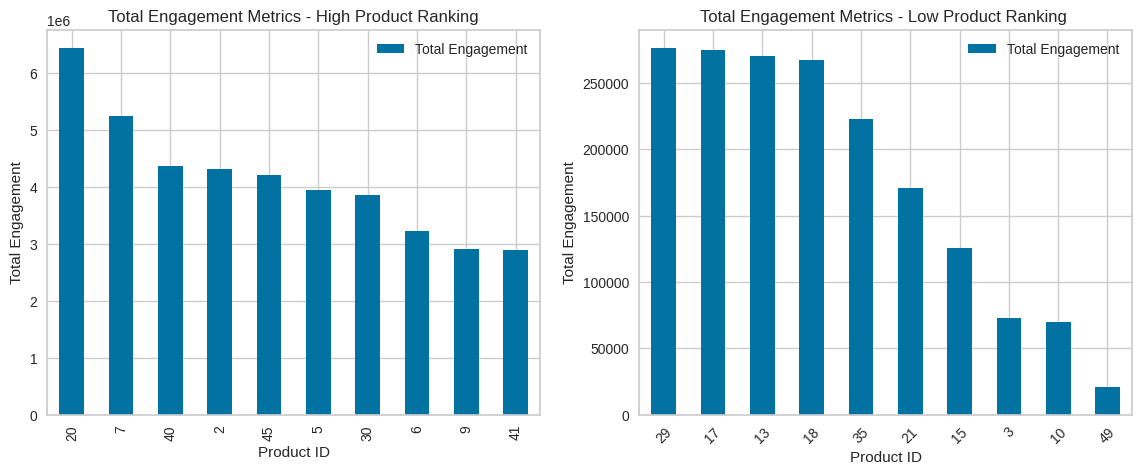

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

top_products.plot(kind='bar', ax=axes[0])
axes[0].set_title('Total Engagement Metrics - High Product Ranking')
axes[0].set_xlabel('Product ID')
axes[0].set_ylabel('Total Engagement')
plt.xticks(rotation=45)

bottom_products.plot(kind='bar', ax=axes[1])
axes[1].set_title('Total Engagement Metrics - Low Product Ranking ')
axes[1].set_xlabel('Product ID')
axes[1].set_ylabel('Total Engagement')
plt.xticks(rotation=45)
plt.show()


****Compare performance metrics (CTR, impressions, engagement) across different ad formats and platforms within each demographic segment.****

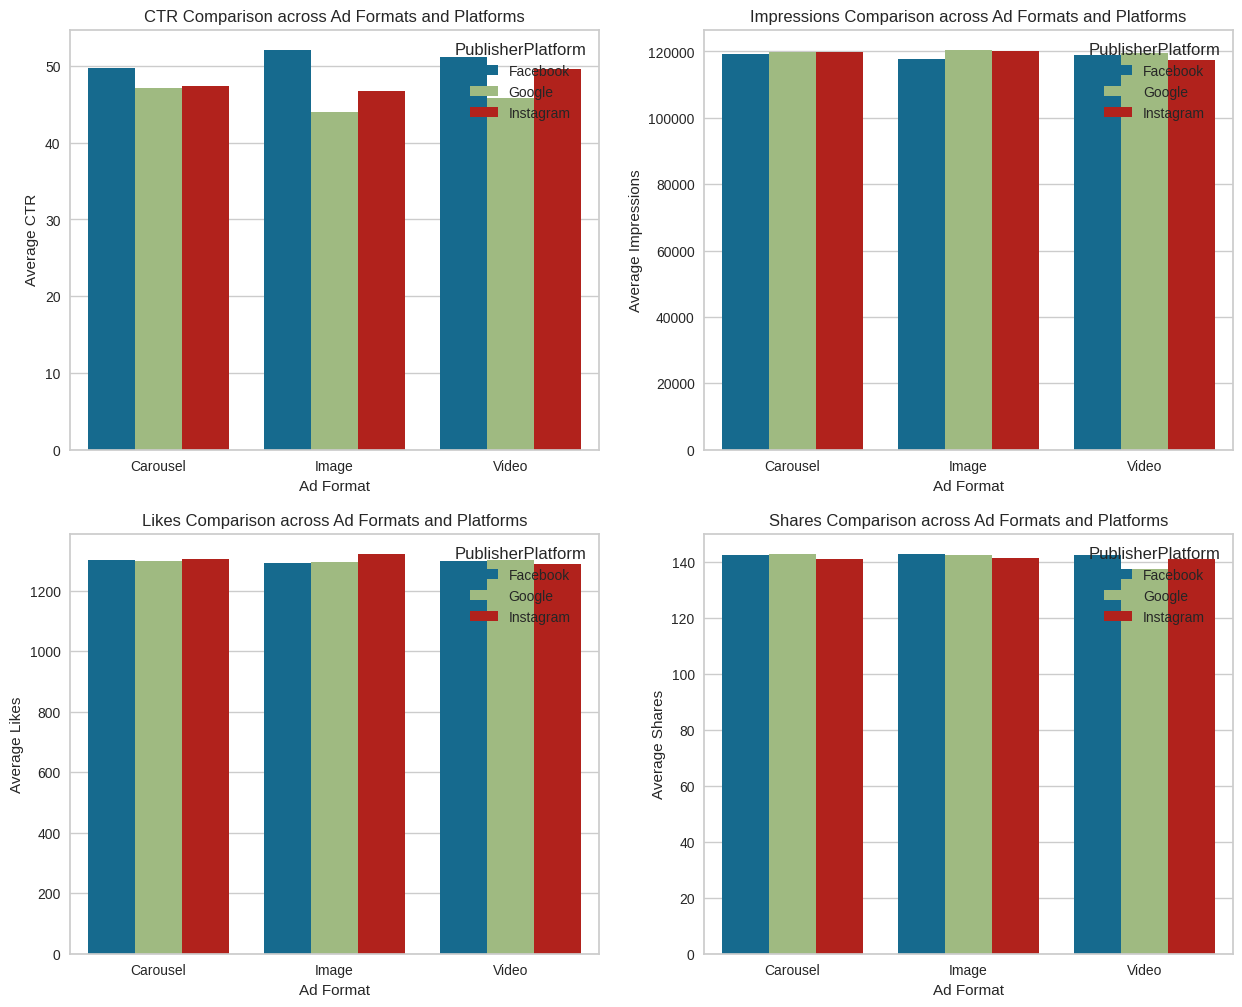

In [ ]:
#From the output , ad video in Google has high CTR, ad Carousel in Google has high Impressions ,
#ad Image in facebook has high Impressions, Image in facebook has high likes and Carousel in Google has high shares

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

ax1 = axes[0, 0]
a = df.groupby(['ContentType', 'PublisherPlatform']).agg({
        'CTR': 'mean'
    }).reset_index()
sns.barplot(x='ContentType', y='CTR', hue='PublisherPlatform', data=a,ax=ax1)
ax1.set_title('CTR Comparison across Ad Formats and Platforms')
ax1.set_xlabel('Ad Format')
ax1.set_ylabel('Average CTR')

ax2 = axes[0, 1]
a = df.groupby(['ContentType', 'PublisherPlatform']).agg({
        'Impressions': 'mean'
    }).reset_index()
sns.barplot(x='ContentType', y='Impressions', hue='PublisherPlatform', data=a,ax=ax2)
ax2.set_title('Impressions Comparison across Ad Formats and Platforms')
ax2.set_xlabel('Ad Format')
ax2.set_ylabel('Average Impressions')

ax3 = axes[1, 0]
a = df.groupby(['ContentType', 'PublisherPlatform']).agg({
        'Likes': 'mean'
    }).reset_index()
sns.barplot(x='ContentType', y='Likes', hue='PublisherPlatform', data=a,ax=ax3)
ax3.set_title('Likes Comparison across Ad Formats and Platforms')
ax3.set_xlabel('Ad Format')
ax3.set_ylabel('Average Likes')

ax4 = axes[1, 1]
a = df.groupby(['ContentType', 'PublisherPlatform']).agg({
        'Shares': 'mean'
    }).reset_index()
sns.barplot(x='ContentType', y='Shares', hue='PublisherPlatform', data=a,ax=ax4)
ax4.set_title('Shares Comparison across Ad Formats and Platforms')
ax4.set_xlabel('Ad Format')
ax4.set_ylabel('Average Shares')
plt.show()

****Insights****

High CTR for Ad Image in Facebook: Ad videos on the Facebook platform exhibit a notably high Click-Through Rate (CTR), indicating a higher percentage of users clicking on these image ads compared to other formats on the same platform.

High Impressions for Image in Google: Image on Google have high impressions, suggesting that these formats receive more views or exposures to users on their respective platforms.

High Likes for Image in Instagram: Image ads on Instagram receive higher likes compared to other formats, indicating a stronger positive response or engagement from users specifically towards image-based ads on this platform.

High Shares for Carousel in Google: Carousel ads on Google receive higher shares, indicating that users tend to share or distribute carousel-format advertisements more frequently compared to other formats on this platform.

## Feature Engineering


****Drop columns that are not relevant to the problem****

In [ ]:
df.drop(columns=['AccountID','CampaignID','AdID','Date','CPC'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['AdBackgroundColor', 'AdPlacement', 'UTMSource', 'UTMMedium',
       'ImpressionDevice', 'PublisherPlatform', 'Gender', 'ContentType',
       'Clicks', 'Impressions', 'ExternalEvents', 'Trends', 'VideoViewCount',
       'PersonAge', 'Emotions', 'ObjectLabel', 'ObjectShape', 'Likes',
       'Shares', 'Comments', 'Daily_Internet_Usage',
       'Daily_Time_Spent_on_Platform', 'Number of Conversions', 'Channel',
       'campaign_days', 'product_id', 'Daily_Budget', 'Spend',
       'Video_Duration_In_Seconds', 'Clicked_on_Ad', 'DayofWeek', 'Month',
       'Conversion_Rate', 'CPM', 'CTR'],
      dtype='object')

In [ ]:
#removing all these features since theses features dont contribute much to the target variable
del data['AccountID']
del data['CampaignID']
del data['AdID']
del data['UTMSource']
del data['UTMMedium']
del data['ObjectLabel']
del data['ObjectShape']
del data['ExternalEvents']
df.drop(['product_id'],axis=1,inplace=True)

## Anova test statistical method

****Analysis of Variance is a statistical method, used to check the means of two or more groups that are significantly different from each other. It assumes Hypothesis as. H0: Means of all groups are equal.****

In [ ]:
a=df.select_dtypes(exclude='object').columns
b='Clicked_on_Ad'
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            pass
FunctionAnova(df, b, a)

##### ANOVA Results ##### 

Clicks is correlated with Clicked_on_Ad | P-Value: 0.0
Impressions is correlated with Clicked_on_Ad | P-Value: 0.023649159718156308
VideoViewCount is correlated with Clicked_on_Ad | P-Value: 0.04631295630029996
PersonAge is correlated with Clicked_on_Ad | P-Value: 0.02853920124717143
Likes is correlated with Clicked_on_Ad | P-Value: 0.004604207904373749
Comments is correlated with Clicked_on_Ad | P-Value: 0.004586675472519669
Daily_Internet_Usage is correlated with Clicked_on_Ad | P-Value: 3.175725168347695e-05
Daily_Time_Spent_on_Platform is correlated with Clicked_on_Ad | P-Value: 1.0607423426790267e-86
Number of Conversions is correlated with Clicked_on_Ad | P-Value: 5.1662630655104447e-51
campaign_days is correlated with Clicked_on_Ad | P-Value: 6.828302848176564e-270
Daily_Budget is correlated with Clicked_on_Ad | P-Value: 0.00011827461384688665
Spend is correlated with Clicked_on_Ad | P-Value: 0.0
Video_Duration_In_Seconds is correlated with Clicked_on

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning:

Each of the input arrays is constant;the F statistic is not defined or infinite



## Chi-square statistical test

****Chi-square is a statistical test that examines the differences between categorical variables from a random sample in order
to determine whether the expected and observed results are well-fitting.It is used to compare observed results with expected results.****

In [ ]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)

        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])

    return(SelectedPredictors)
FunctionChisq(df, b, a)

Gender is NOT correlated with Clicked_on_Ad | P-Value: 0.4940464972183525
Clicks is correlated with Clicked_on_Ad | P-Value: 0.0
Impressions is NOT correlated with Clicked_on_Ad | P-Value: 0.5810470399834495
VideoViewCount is NOT correlated with Clicked_on_Ad | P-Value: 0.4626538333665432
PersonAge is correlated with Clicked_on_Ad | P-Value: 0.0043851599703650344
Likes is NOT correlated with Clicked_on_Ad | P-Value: 0.3235694895406104
Shares is correlated with Clicked_on_Ad | P-Value: 0.0012012831864184302
Comments is correlated with Clicked_on_Ad | P-Value: 0.006145240989665172
Daily_Internet_Usage is correlated with Clicked_on_Ad | P-Value: 0.010075791608289501
Daily_Time_Spent_on_Platform is correlated with Clicked_on_Ad | P-Value: 7.172080965739618e-65
Number of Conversions is correlated with Clicked_on_Ad | P-Value: 0.0
campaign_days is correlated with Clicked_on_Ad | P-Value: 0.0
Daily_Budget is correlated with Clicked_on_Ad | P-Value: 0.0
Spend is correlated with Clicked_on_Ad |

['Clicks',
 'PersonAge',
 'Shares',
 'Comments',
 'Daily_Internet_Usage',
 'Daily_Time_Spent_on_Platform',
 'Number of Conversions',
 'campaign_days',
 'Daily_Budget',
 'Spend',
 'Video_Duration_In_Seconds',
 'Clicked_on_Ad',
 'DayofWeek',
 'Month',
 'Conversion_Rate',
 'CPM',
 'CTR']

#### Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df.corr()

<ipython-input-453-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Gender    Clicks  Impressions  VideoViewCount  \
Gender                        1.000000 -0.001455    -0.004228       -0.000569   
Clicks                       -0.001455  1.000000    -0.008474       -0.005113   
Impressions                  -0.004228 -0.008474     1.000000       -0.004707   
VideoViewCount               -0.000569 -0.005113    -0.004707        1.000000   
PersonAge                    -0.006915 -0.006668    -0.000203       -0.002852   
Likes                        -0.000055  0.005829     0.005470       -0.004608   
Shares                        0.001434  0.005513    -0.001328        0.002718   
Comments                      0.009980  0.014278    -0.003308        0.008394   
Daily_Internet_Usage          0.003570  0.016343     0.001648        0.009314   
Daily_Time_Spent_on_Platform  0.005283  0.069742     0.004861       -0.009884   
Number of Conversions         0.003431  0.051024     0.000419       -0.006865   
campaign_days                -0.004614  0.119554     0.007138        0.002524   
Daily_Budget                  0.002060  0.015224    -0.003797       -0.004950   
Spend                         0.004335  0.185683    -0.006405       -0.002783   
Video_Duration_In_Seconds    -0.008462  0.006636     0.000877        0.002755   
Clicked_on_Ad                -0.003099  0.778026    -0.010119       -0.008911   
DayofWeek                     0.005117  0.014648    -0.008048        0.007384   
Month                         0.000654  0.011434     0.006326        0.000430   
Conversion_Rate               0.001046 -0.012581    -0.003129       -0.001108   
CPM                          -0.000011  0.050059    -0.459567       -0.005446   
CTR                           0.000325  0.399167    -0.296510       -0.006723   

                              PersonAge     Likes    Shares  Comments  \
Gender                        -0.006915 -0.000055  0.001434  0.009980   
Clicks                        -0.006668  0.005829  0.005513  0.014278   
Impressions                   -0.000203  0.005470 -0.001328 -0.003308   
VideoViewCount                -0.002852 -0.004608  0.002718  0.008394   
PersonAge                      1.000000  0.007108  0.000049 -0.001873   
Likes                          0.007108  1.000000  0.003706 -0.008567   
Shares                         0.000049  0.003706  1.000000  0.013660   
Comments                      -0.001873 -0.008567  0.013660  1.000000   
Daily_Internet_Usage          -0.003788 -0.004784 -0.006335 -0.005138   
Daily_Time_Spent_on_Platform   0.001624  0.001193  0.007535 -0.013531   
Number of Conversions         -0.002217 -0.004694  0.009287 -0.001276   
campaign_days                 -0.005078  0.011710  0.001154  0.001008   
Daily_Budget                   0.004081 -0.008008 -0.000283  0.004570   
Spend                         -0.005202 -0.002449  0.002103 -0.002851   
Video_Duration_In_Seconds      0.000637 -0.000188  0.002315 -0.000252   
Clicked_on_Ad                 -0.009793  0.012672  0.005326  0.012677   
DayofWeek                      0.000756  0.001386  0.000361  0.001373   
Month                          0.004904 -0.000238  0.001094  0.004852   
Conversion_Rate               -0.006850 -0.003761  0.000950 -0.004780   
CPM                            0.000064 -0.003887  0.001989 -0.006636   
CTR                           -0.003125  0.001557  0.009937  0.004979   

                              Daily_Internet_Usage  \
Gender                                    0.003570   
Clicks                                    0.016343   
Impressions                               0.001648   
VideoViewCount                            0.009314   
PersonAge                                -0.003788   
Likes                                    -0.004784   
Shares                                   -0.006335   
Comments                                 -0.005138   
Daily_Internet_Usage                      1.000000   
Daily_Time_Spent_on_Platform             -0.002620   
Number of Conversions                     0.0103

<ipython-input-454-afb2b4e09bbc>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

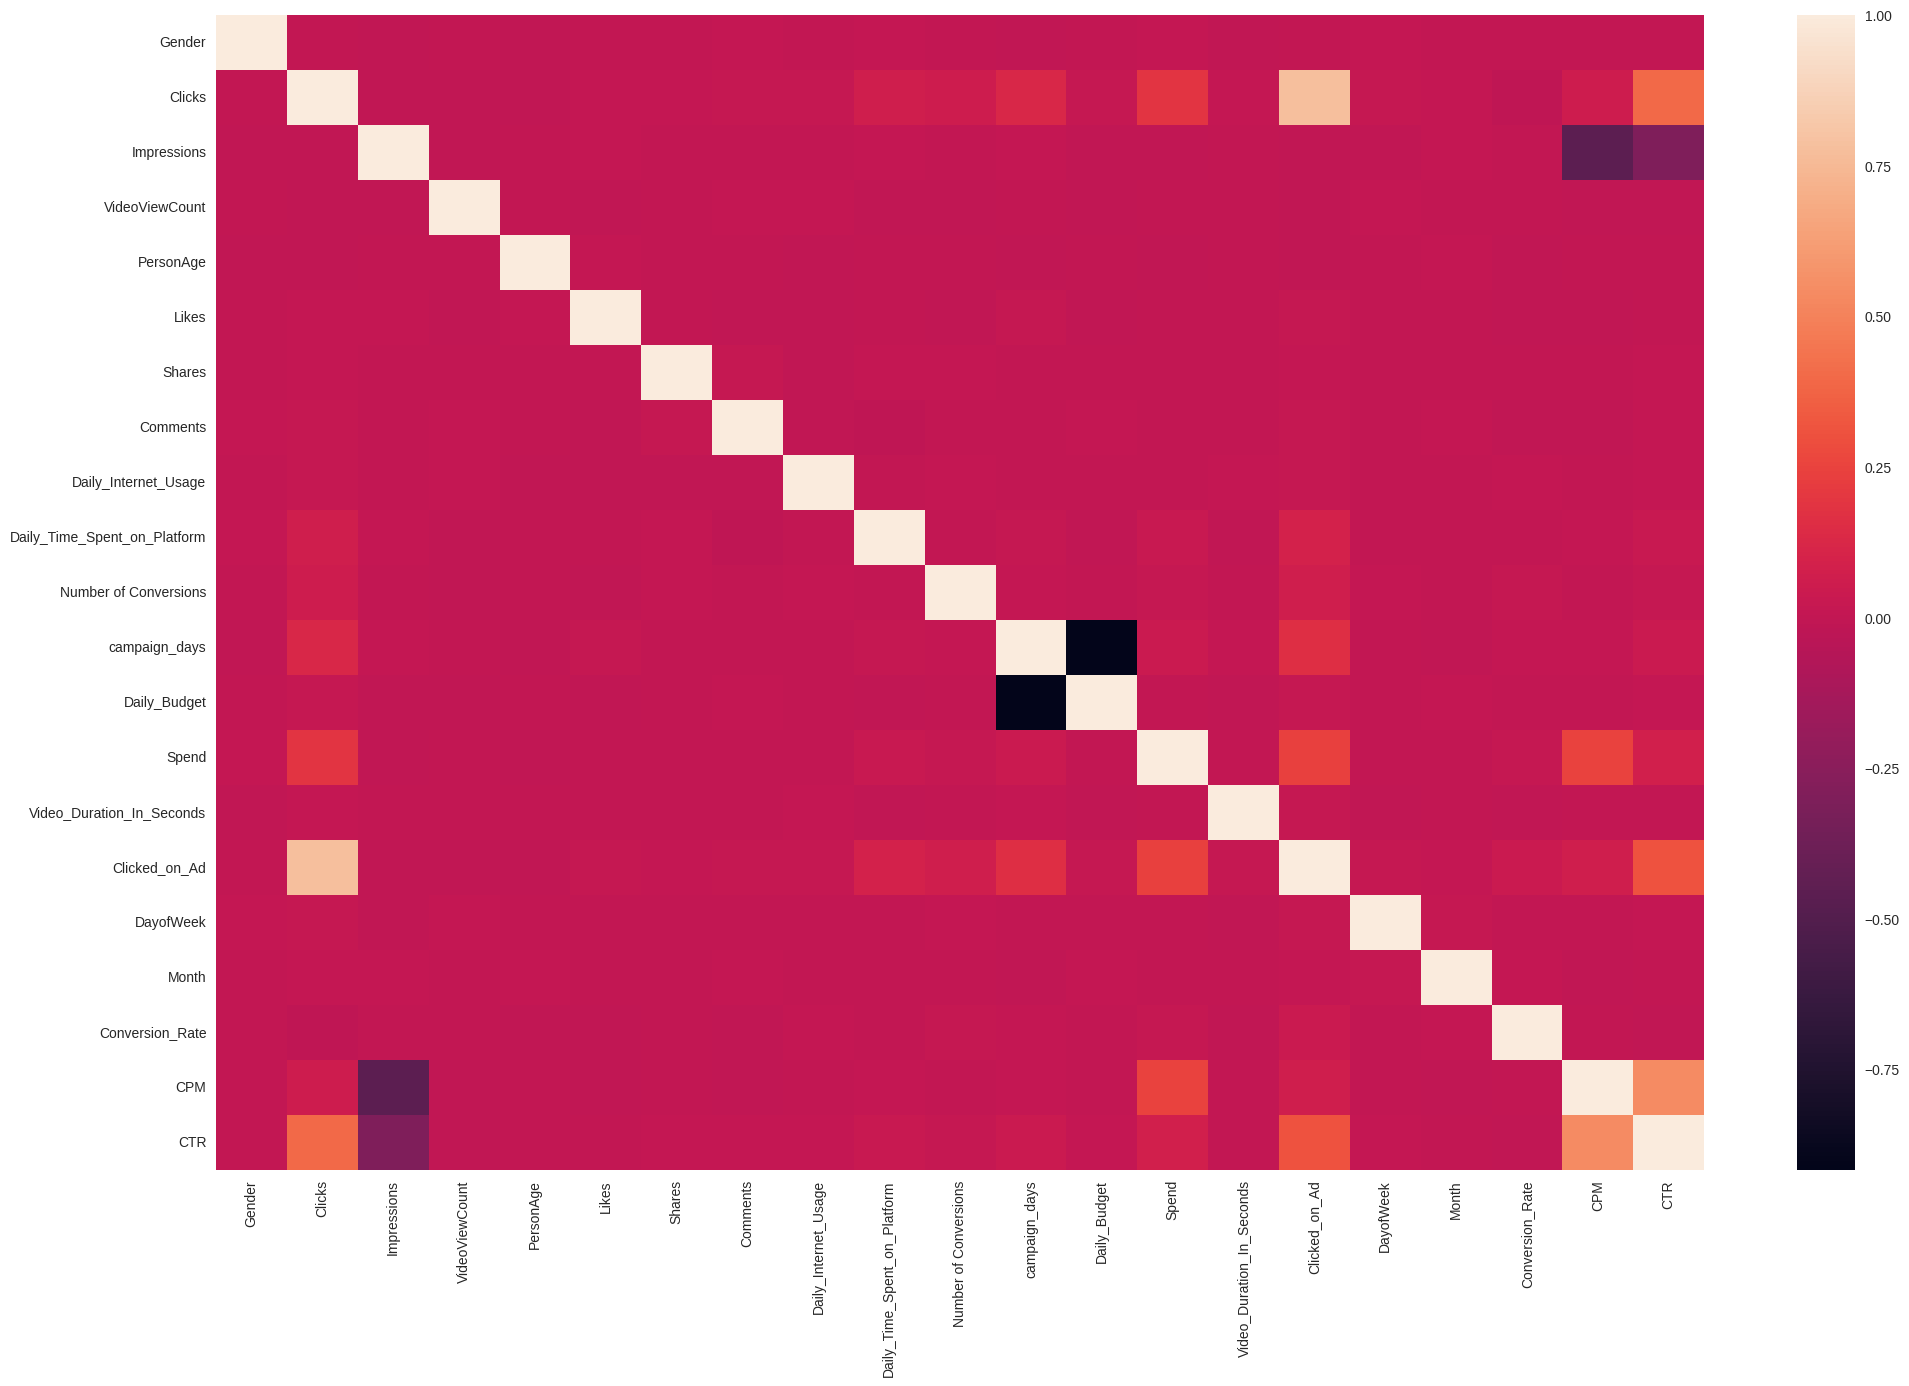

In [ ]:
sns.heatmap(data=df.corr())

In [ ]:
numerical.columns

Index(['Gender', 'Clicks', 'Impressions', 'VideoViewCount', 'PersonAge',
       'Likes', 'Shares', 'Comments', 'Daily_Internet_Usage',
       'Daily_Time_Spent_on_Platform', 'Number of Conversions',
       'campaign_days', 'Daily_Budget', 'Spend', 'Video_Duration_In_Seconds',
       'Clicked_on_Ad', 'DayofWeek', 'Month', 'Conversion_Rate', 'CPM', 'CTR',
       'CPC'],
      dtype='object')

## MODEL BUILDING

In [ ]:
del data['AdBackgroundColor']
del data['AdPlacement']
del data['Trends']

In [ ]:
df['Emotions'] = le.fit_transform(df['Emotions'])
df['ImpressionDevice'] = le.fit_transform(df['ImpressionDevice'])
df['PublisherPlatform'] = le.fit_transform(df['PublisherPlatform'])
df['ContentType'] = le.fit_transform(df['ContentType'])

In [ ]:
#x = data[['Impressions','VideoViewCount','PersonAge','Likes','PublisherPlatform','Emotions','Comments','campaign_days','ImpressionDevice','ContentType','Shares','Daily_Internet_Usage','Daily_Time_Spent_on_Platform','Number of Conversions','Daily_Budget','Spend','Video_Duration_In_Seconds','DayofWeek','Month']]
x = df[['Likes','Comments','campaign_days','Daily_Budget','Spend','Daily_Time_Spent_on_Platform',
       'Spend','Number of Conversions','CPM','Video_Duration_In_Seconds']]
y = df['Clicked_on_Ad']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.30,random_state=42)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
lr = DecisionTreeClassifier(max_depth=3)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.8241428571428572

In [ ]:
lr.score(x_test,y_test)

0.8230666666666666

In [ ]:
yp = lr.predict(x_test)
yp = pd.DataFrame(yp)
yp.head()

0
0  1
1  0
2  0
3  0
4  0

In [ ]:
y_test = pd.DataFrame(y_test)
y_test.head()

Clicked_on_Ad
24873              1
1691               0
28652              0
33801              0
11485              0

In [ ]:
p = pd.merge(y_test,yp,left_index=True,right_index=True)
p.head()

Clicked_on_Ad  0
1691               0  1
11485              0  0
200                1  1
8557               0  1
1087               0  0

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,confusion_matrix,f1_score
cr = classification_report(y_test,yp)
print(cr)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      8065
           1       1.00      0.62      0.76      6935

    accuracy                           0.82     15000
   macro avg       0.88      0.81      0.81     15000
weighted avg       0.87      0.82      0.81     15000



In [ ]:
cm= confusion_matrix(y_test,yp)
cm

array([[8062,    3],
       [2651, 4284]])

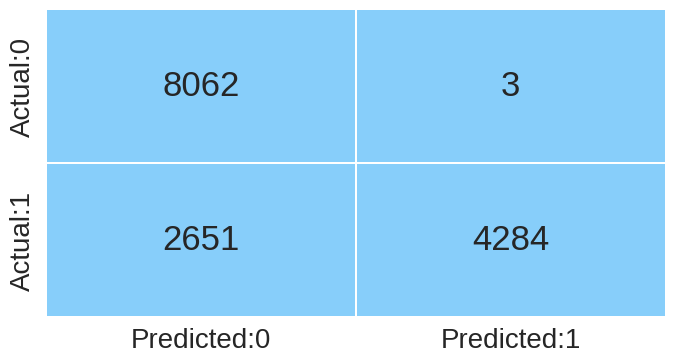

In [ ]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8, 4))
# label the confusion matrix
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)
# display the plot
plt.show()

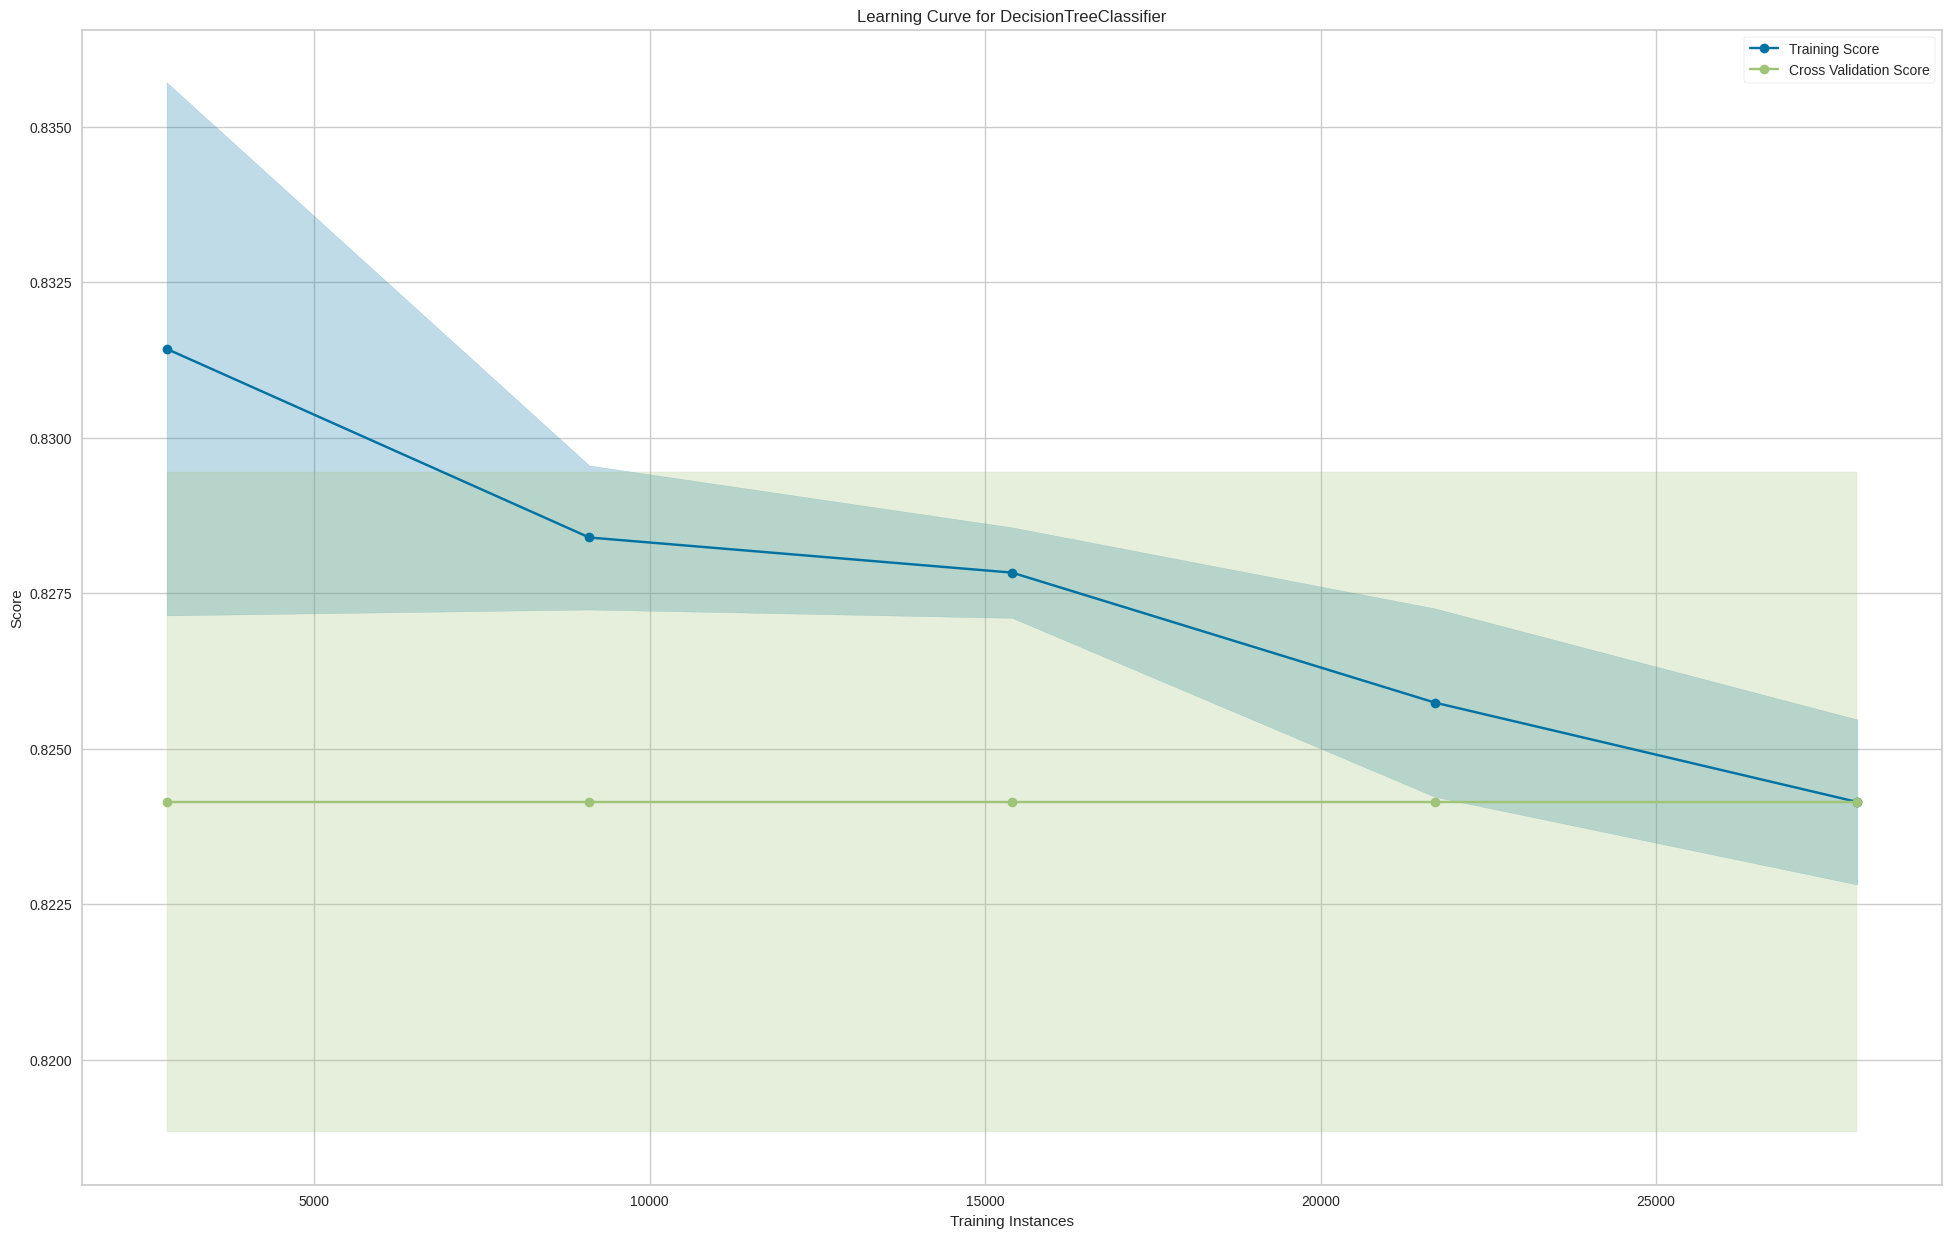

ValueError: ignored

ValueError: ignored

ValueError: ignored

In [ ]:
#The Yellowbrick library is a diagnostic visualization platform for machine learning that allows data scientists
#to steer the model selection process and assist in diagnosing problems throughout the machine learning workflow.

from yellowbrick.model_selection import learning_curve
vis = learning_curve(lr,x_train,y_train)
vis

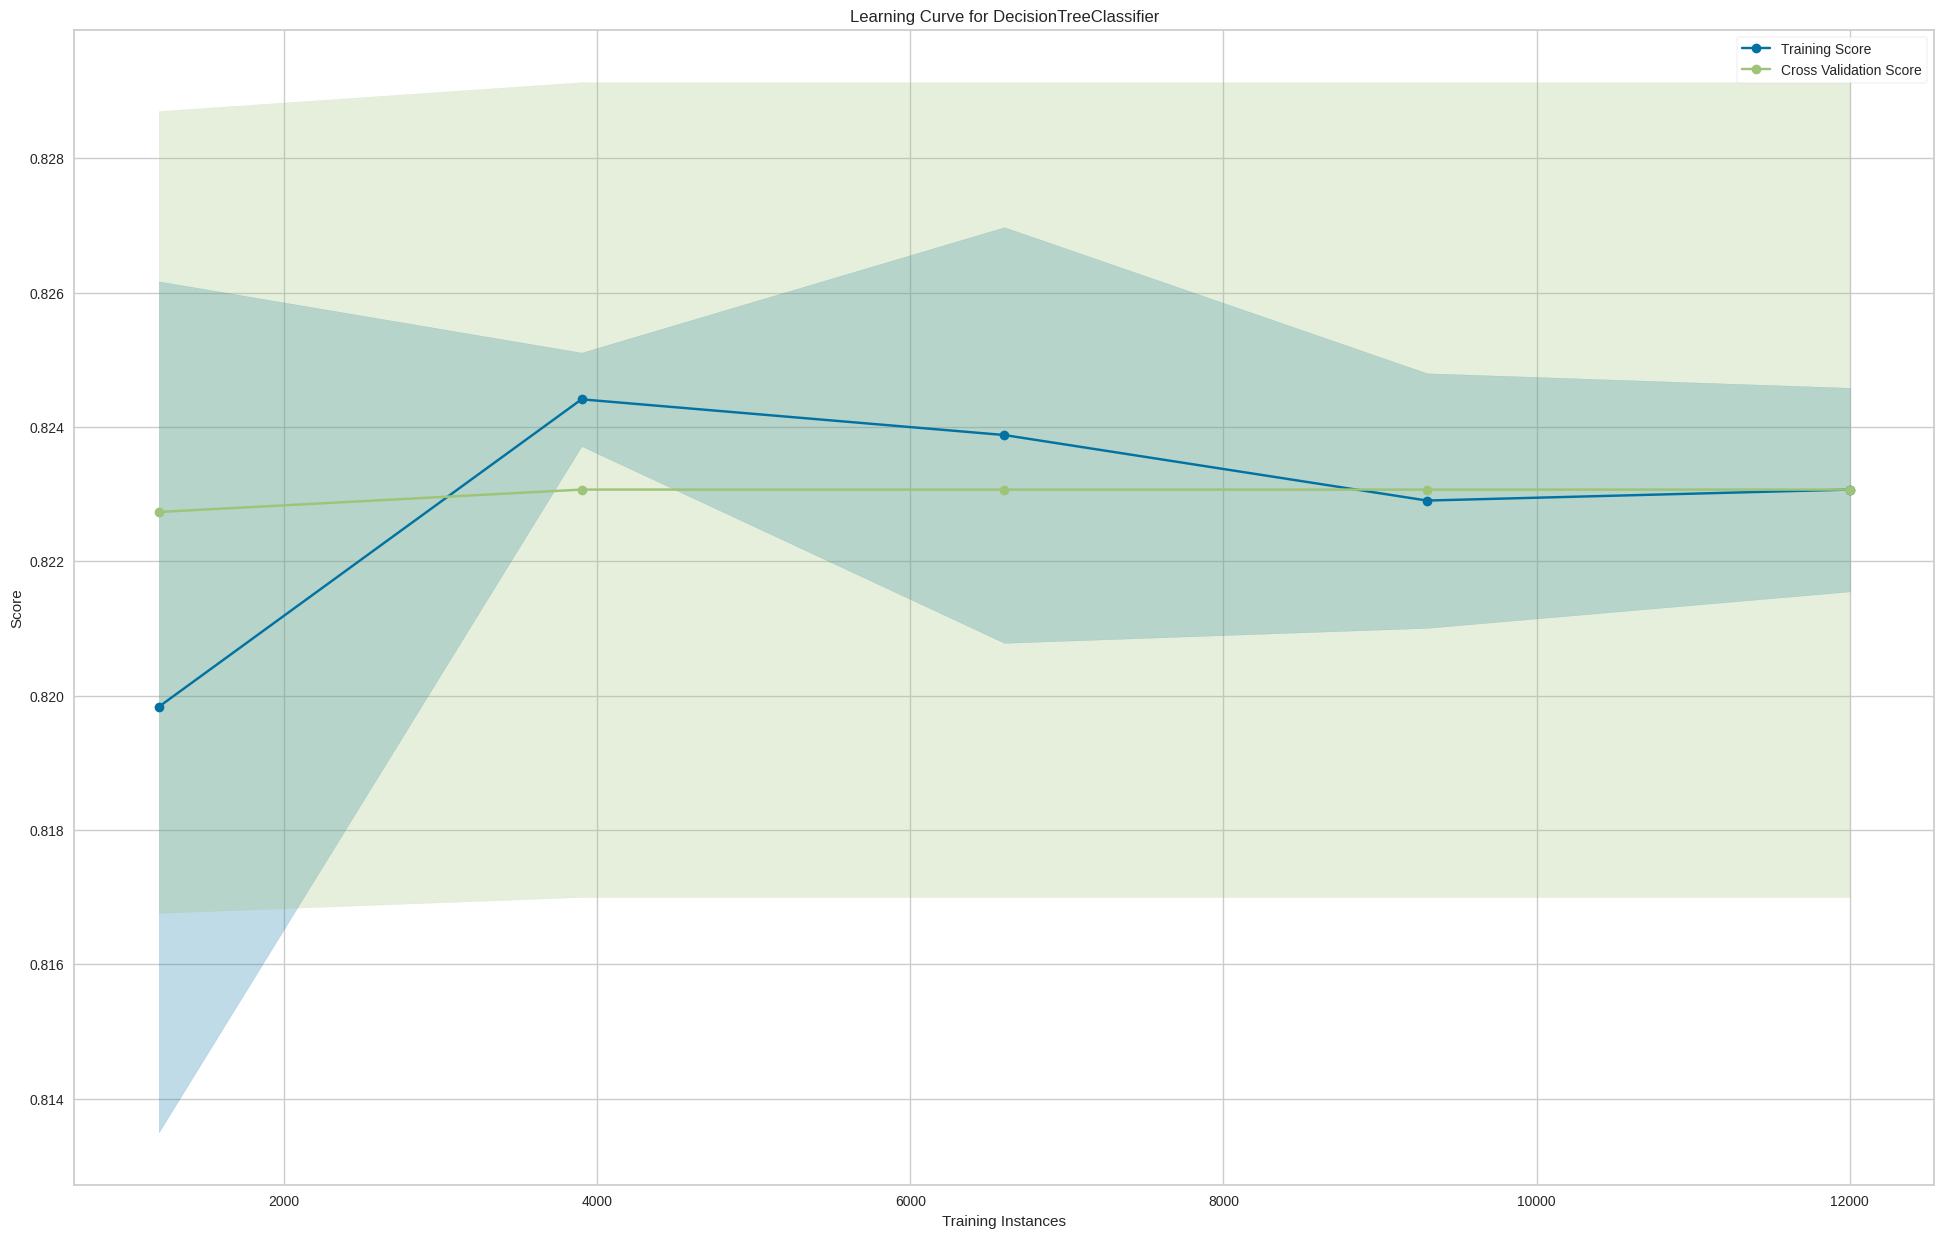

ValueError: ignored

ValueError: ignored

ValueError: ignored

In [ ]:
vis = learning_curve(lr,x_test,y_test)
vis

0.8830349765875047


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



ROCAUC(ax=<Axes: >, estimator=DecisionTreeClassifier(max_depth=3))

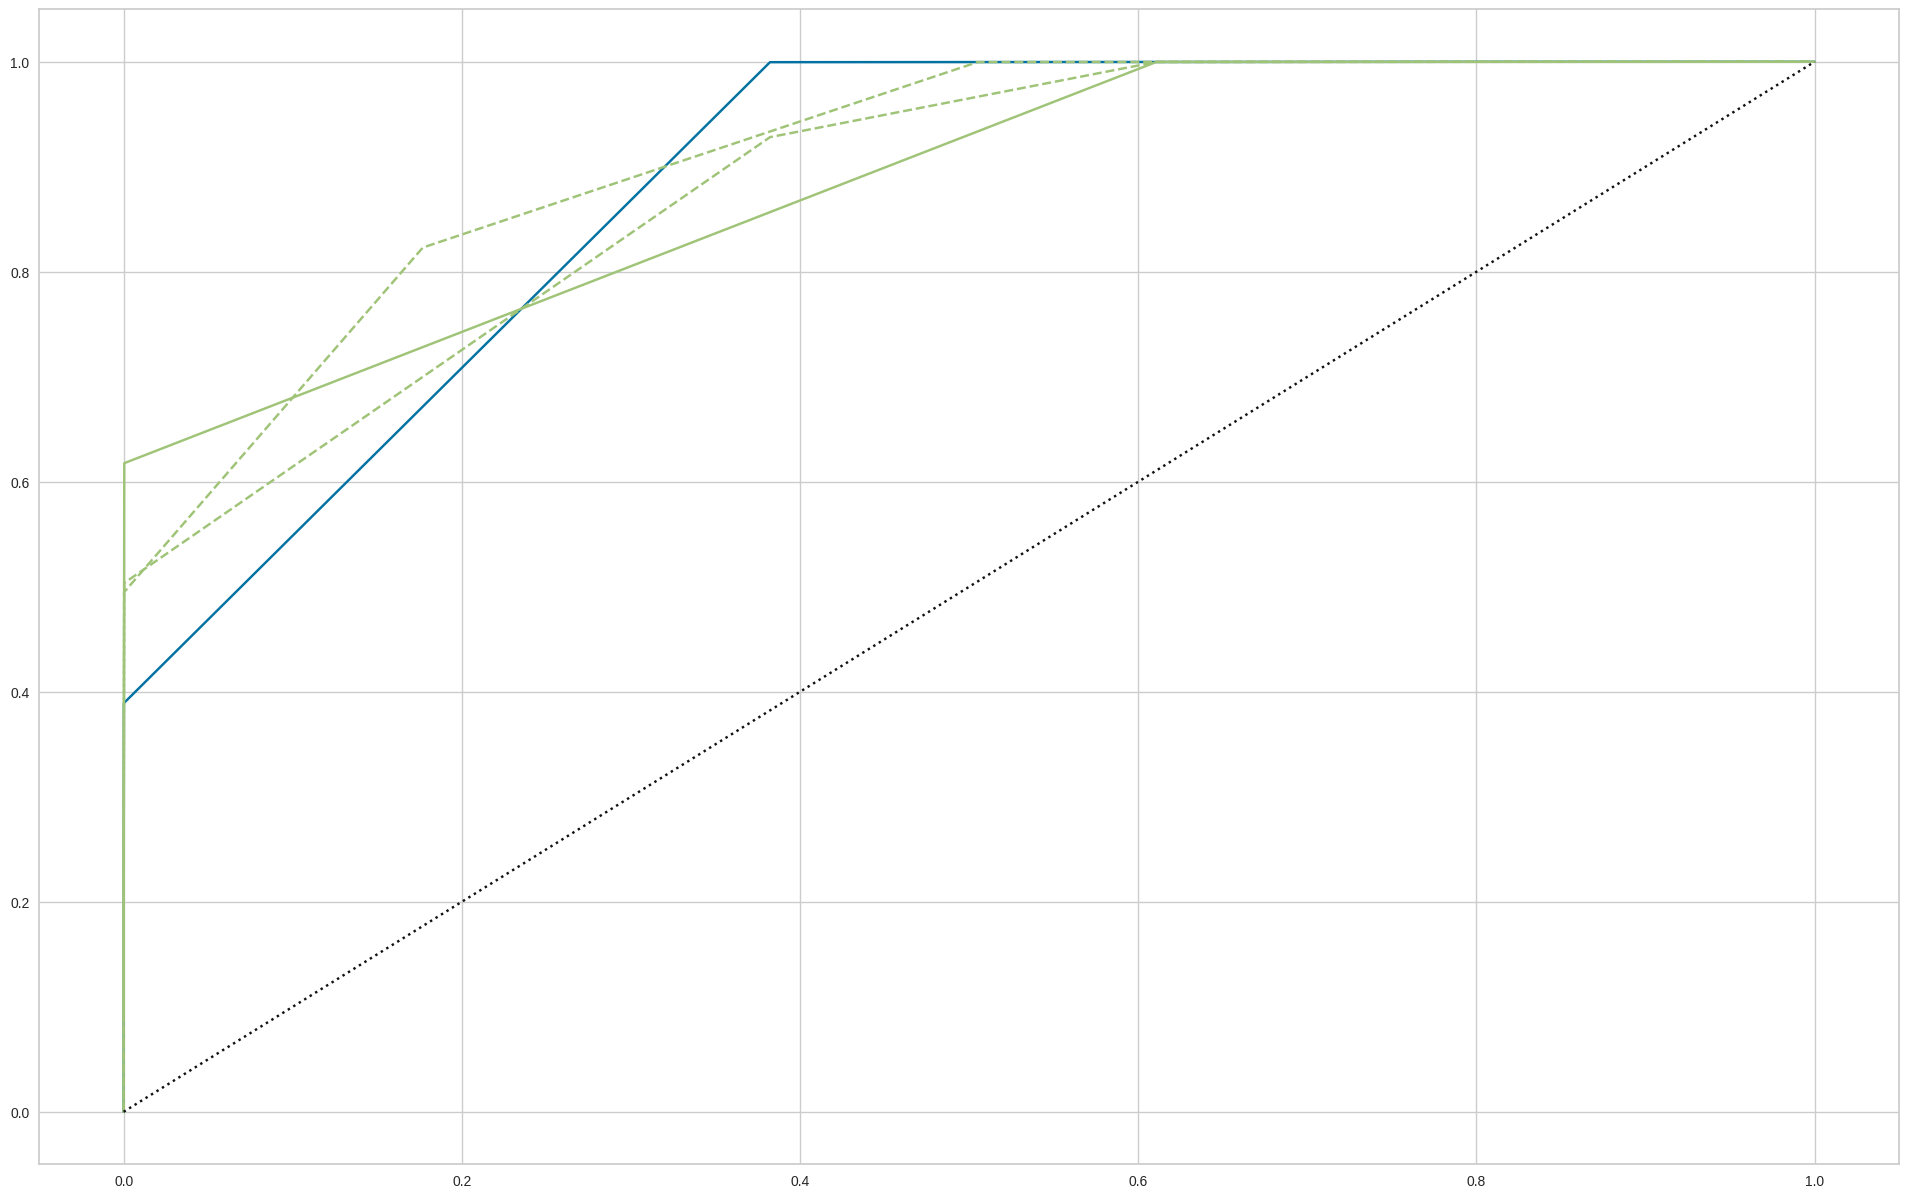

In [ ]:
#In an ROC Curve, the diagonal represents the baseline model/random classifier.
#The closer an ROC curve comes to the 45-degree diagonal of the ROC space, the less powerful is the model.
#The area under the ROC Curve is also known as AUC.
#In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients with and without the
#disease or condition based on the test), 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent,
#and more than 0.9 is considered outstanding.

from yellowbrick.classifier import ROCAUC,PrecisionRecallCurve
vis = ROCAUC(lr)
vis.fit(x_train,y_train)
print(vis.score(x_test,y_test))
vis

0.8409063661889178


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



PrecisionRecallCurve(ax=<Axes: >, estimator=DecisionTreeClassifier(max_depth=3),
                     iso_f1_values={0.2, 0.4, 0.6, 0.8})

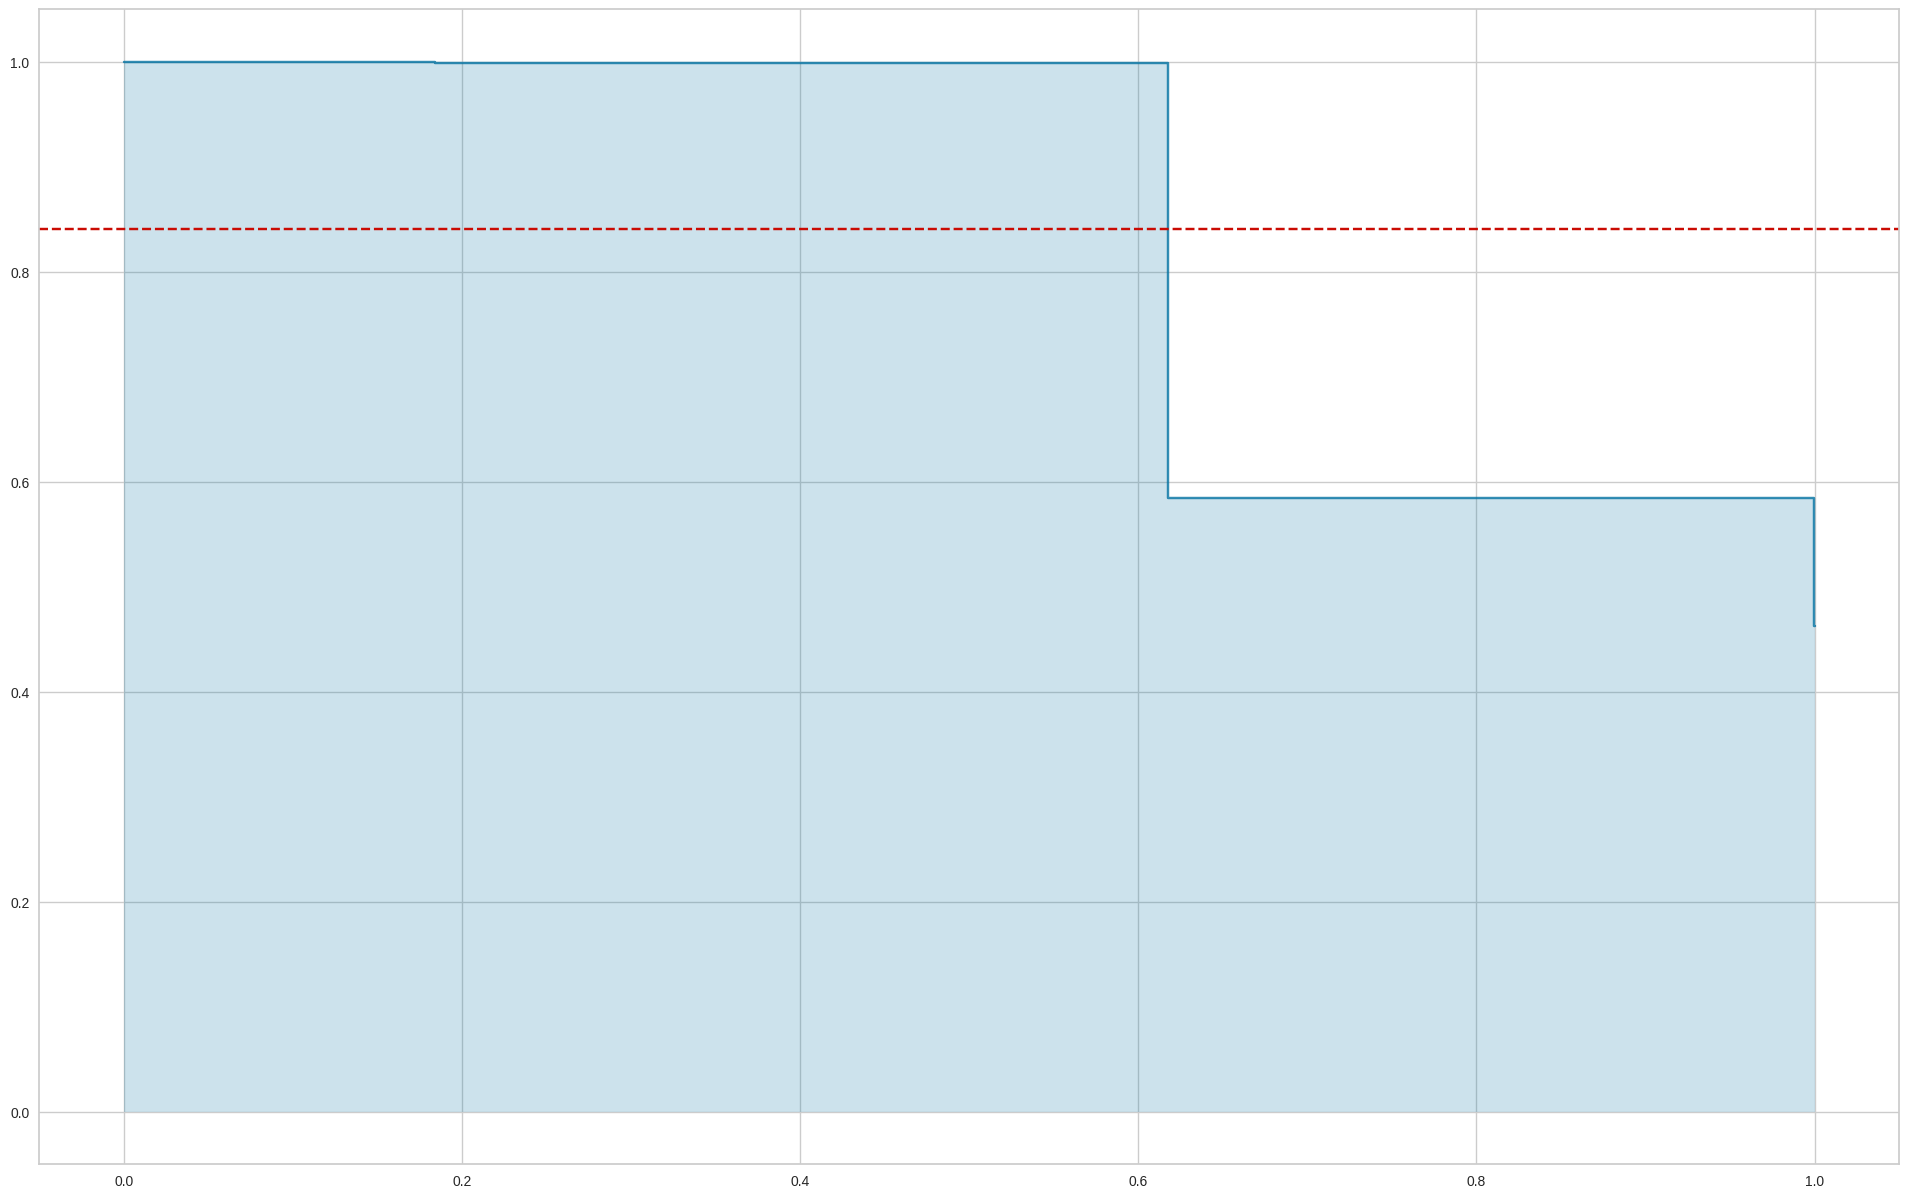

In [ ]:
vis = PrecisionRecallCurve(lr)
vis.fit(x_train,y_train)
print(vis.score(x_test,y_test))
vis

In [ ]:
from sklearn.model_selection import cross_val_score
values = cross_val_score(lr,x_test,y_test,cv=10,scoring='f1_weighted')
print('The CV values for 10 cross validations are:',values)
print('The Average CV values for 10 cross validations are:',(values.mean()))

The CV values for 10 cross validations are: [0.80901877 0.81129407 0.82247891 0.79972584 0.82546904 0.82691662
 0.819431   0.79349115 0.82617081 0.81199948]
The Average CV values for 10 cross validations are: 0.814599568470717


## Conclusion on the Decision Tree Model:


The decision tree model achieved an overall accuracy of 82%, indicating a reasonably successful predictive performance in forecasting the target variable, likely "Clicked_on_Ad." This suggests that the features selected for the model, have meaningful predictive power.

Future Enhancements:
Advanced Models: Explore more complex machine learning models like neural networks methods to leverage their capacity to capture intricate patterns in the data.

Dynamic Feature Selection: Implement techniques for dynamic feature selection that adapt to changing trends in user behavior and preferences, ensuring the model remains relevant over time.

A/B Testing: Conduct A/B testing on different ad creatives and strategies to gather real-time data on what works best for the target audience. Incorporate these findings into the model to continually improve predictions.

User Segmentation: Refine the model by incorporating user segmentation based on behavior, preferences, and demographics. Tailor ad creatives and strategies to specific segments for more personalized and effective advertising.
Tailored advertising places an emphasis on the needs and wants of a small set of people or an individual consumer, as opposed to a mass audience. Tailored (or targeted) advertising may focus on any number of specific demographic characteristics, habits, identifying traits, behaviors, or contexts of consumers.


## CTR Predictions

In [ ]:
#x = data[['Impressions','VideoViewCount','PersonAge','Likes','PublisherPlatform','Emotions','Comments','campaign_days','ImpressionDevice','ContentType','Shares','Daily_Internet_Usage','Daily_Time_Spent_on_Platform','Number of Conversions','Daily_Budget','Spend','Video_Duration_In_Seconds','DayofWeek','Month']]
x = df[['Likes','Comments','campaign_days','Daily_Budget',
       'Spend','Number of Conversions','CPM','Video_Duration_In_Seconds']]
y = df['Clicked_on_Ad']
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
#lr = DecisionTreeRegressor(random_state = 0)
lr=RandomForestRegressor(n_estimators=500,max_depth=4,random_state=42)

lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.7150290284962804

In [ ]:
lr.score(x_test,y_test)

0.7138533915027042

In [ ]:
lr.fit(x_train,y_train)
ypred_train=lr.predict(x_train)
ypred_test=lr.predict(x_test)

In [ ]:
rmse_train=np.sqrt(mean_squared_error(y_train,ypred_train))
rmse_test=np.sqrt(mean_squared_error(y_test,ypred_test))
print('rmse_train:',rmse_train)
print('rmse_test:',rmse_test)

rmse_train: 0.2661815501043251
rmse_test: 0.26664291125214706


## Text Sentimental Prediction

In [ ]:
df['Emotions']

0        1
1        1
2        1
3        0
4        2
5        1
6        0
7        0
8        1
9        1
10       2
11       2
12       0
13       0
14       2
15       2
16       1
17       1
18       2
19       1
20       2
21       1
22       2
23       0
24       2
25       1
26       2
27       1
28       1
29       0
30       2
31       1
32       0
33       2
34       2
35       0
36       2
37       2
38       0
39       1
40       0
41       0
42       1
43       2
44       0
45       1
46       1
47       2
48       1
49       2
50       0
51       1
52       1
53       0
54       0
55       0
56       2
57       2
58       0
59       1
60       1
61       2
62       1
63       1
64       0
65       2
66       2
67       2
68       1
69       2
70       1
71       2
72       2
73       2
74       1
75       2
76       0
77       1
78       0
79       1
80       0
81       1
82       1
83       0
84       2
85       2
86       0
87       0
88       0
89       1
90       2

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
a=pd.read_csv('Synthetic_New_3.csv')

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Assuming 'Ad Background Color' as the text column for sentiment analysis
text_column = a['Emotions']

# Calculate sentiment scores for each text
sentiment_scores = text_column.apply(lambda x: sia.polarity_scores(x))

# Extracting sentiment scores
sentiment_df = pd.DataFrame(sentiment_scores.tolist())

# Joining sentiment scores with the original dataframe
df_with_sentiment = pd.concat([a, sentiment_df], axis=1)

df_with_sentiment.head()
#NLTK's SentimentIntensityAnalyzer to perform sentiment analysis on the 'Ad Background Color' column and extract
#sentiment scores (positive, negative, neutral, compound) for each text entry. You can extend this analysis to other
#textual columns in a similar manner and explore sentiments across different attributes in our dataset.


AccountID CampaignID    AdID AdBackgroundColor AdPlacement UTMSource  \
0  Account_1448     _RARE_  _RARE_              Blue      Header  Source_B   
1  Account_2363     _RARE_  _RARE_              Blue      Header  Source_A   
2  Account_2019     _RARE_  _RARE_            Yellow      Footer  Source_C   
3  Account_2953     _RARE_  _RARE_              Blue      Header  Source_B   
4  Account_6833     _RARE_  _RARE_             Green      Footer  Source_C   

  UTMMedium ImpressionDevice PublisherPlatform  Gender ContentType  Clicks  \
0  Medium_A          Desktop          Facebook    Male       Video       0   
1  Medium_C           Tablet          Facebook  Female    Carousel       0   
2  Medium_C           Tablet          Facebook    Male    Carousel       0   
3  Medium_C          Desktop          Facebook  Female       Image       0   
4  Medium_A           Tablet            Google    Male       Image       0   

   Impressions        Date ExternalEvents    Trends  VideoViewCount  \
0       105729  2023-02-12       No Event  Downward           92830   
1       170564  2023-09-23        Event B    Stable           70559   
2        40507  2023-07-12        Event A    Upward           16706   
3       146867  2023-11-16        Event B    Stable           28927   
4       124167  2023-09-30        Event B  Downward           38014   

   PersonAge Emotions ObjectLabel ObjectShape  Likes  Shares  Comments  \
0         41  Neutral     Product      Square   1708       2       224   
1         30  Neutral       Brand    Triangle   2558     117       174   
2         25  Neutral       Brand      Circle   1339     194       320   
3         61    Happy     Product      Square   2034     133       287   
4         32      Sad     Product    Triangle   1197     274       135   

   Daily_Internet_Usage  Daily_Time_Spent_on_Platform  Number of Conversions  \
0                   274                           104                      6   
1                   414                            72                     12   
2                   250                            58                     55   
3                   442                            93                     48   
4                   418                            77                     48   

        Channel  campaign_days product_id  Daily_Budget  Spend  \
0      Referral             15    Prod_14         22033      4   
1  Social Media             22     Prod_2         15423     20   
2       Organic             28    Prod_25         12338     23   
3      Referral             11    Prod_17         30847      1   
4      Referral             34    Prod_34         10282     24   

   Video_Duration_In_Seconds  Clicked_on_Ad  DayofWeek  Month  neg  neu  pos  \
0                         36              0          2     11  0.0  1.0  0.0   
1                        158              0          4      3  0.0  1.0  0.0   
2                        131              0          5      6  0.0  1.0  0.0   
3                        154              0          3      6  0.0  0.0  1.0   
4                         31              0          5      1  1.0  0.0  0.0   

   compound  
0    0.0000  
1    0.0000  
2    0.0000  
3    0.5719  
4   -0.4767

In [ ]:
df_with_sentiment[['pos','neu','neg','Emotions']].value_counts()

pos  neu  neg  Emotions
0.0  1.0  0.0  Neutral     17229
     0.0  1.0  Sad         16929
1.0  0.0  0.0  Happy       15842
dtype: int64

## 5 Effective Strategies to Improve Ad Advertisement:


Personalization and Targeting:

Utilize advanced targeting strategies based on user preferences, behavior, and demographics to deliver personalized ad content. This can significantly improve engagement rates.

Creative Diversity:

Experiment with a diverse range of ad creatives, including visuals, messaging, and formats. A/B testing can help identify the most effective creative elements and inform future content production.

Adaptive Campaigns:

Implement dynamic, data-driven ad campaigns that adapt in real-time based on user interactions and performance metrics. This ensures campaigns stay relevant and effective as audience preferences evolve.

Cross-Channel Integration:

Integrate advertising efforts across multiple channels to create a cohesive and seamless brand experience. Consistent messaging and branding can reinforce the impact of advertisements.

Continuous Monitoring and Optimization:

Establish a system for continuous monitoring of ad performance and regularly optimize campaigns based on real-time data. This iterative process ensures that advertising strategies stay aligned with evolving audience behaviors.

By combining advanced modeling techniques, ongoing experimentation, and a commitment to understanding the target audience, the advertising agency can not only enhance predictive capabilities but also continually refine and improve their advertising strategies.

In [ ]:
A scenario where your model has high precision but low recall for a specific class (in your case, class '0') often indicates a few potential scenarios:

Imbalanced Data: There might be a severe class imbalance, where instances of class '0' are significantly outnumbered by instances of other classes. The model might predict class '0' very rarely (low recall) but when it does, it's correct most of the time (high precision).

Misclassification of '0' Instances: The model might have difficulty correctly identifying instances of class '0' due to similarities with other classes. This leads to a high number of false negatives (low recall).

Threshold Selection: The threshold for classification might be set in such a way that the model predicts class '0' only when it's very confident, leading to higher precision but missing many actual instances of class '0' (low recall).

To address this issue:

Rebalance Data: Consider techniques such as oversampling, undersampling, or generating synthetic data for the minority class to balance the dataset.

Adjust Threshold: Experiment with different classification thresholds to find a balance between precision and recall. Lowering the threshold may increase recall but might reduce precision.

Feature Engineering: Revisit the features used for classification. There might be additional features or modifications that can better separate instances of class '0' from others.

Model Selection or Tuning: Try different models or tune hyperparameters to improve the model's ability to correctly classify instances of class '0'.

Ensemble Methods: Consider ensemble methods or more complex models that handle imbalanced data better.

Understanding the domain and context of your data is crucial to interpret and adjust the model's behavior effectively. It might require a combination of techniques to achieve a better balance between precision and recall for class '0'.

In [ ]:
Adjusting the classification threshold can significantly impact the trade-off between precision and recall for different classes in a classifier. Here's a step-by-step approach to evaluate the impact:

Understanding the Threshold:

Initially, the threshold for classification (typically 0.5) is used. This threshold determines the probability above which a sample is classified as positive.
Threshold Adjustment:

Lowering the threshold increases the number of instances classified as positive. It usually improves recall but might reduce precision.
Raising the threshold decreases the number of instances classified as positive. It often improves precision but might reduce recall.
Calculate F1 Scores for Different Thresholds:

Create a range of threshold values (e.g., 0.1 to 0.9) or choose specific thresholds to test.
For each threshold:
Adjust the classifier's predicted probabilities using the chosen threshold.
Calculate precision, recall, and F1 score for each class.
Plot Precision-Recall Curves:

Plot precision-recall curves for different thresholds for each class.
These curves show how precision and recall change as the threshold varies, providing insights into the trade-offs.
Choose Optimal Threshold:

Determine the threshold that optimizes the trade-off between precision and recall based on your specific problem's requirements.
You may prioritize precision over recall or vice versa, depending on the application.
Evaluate on Validation Data:

After selecting an optimal threshold based on training data, evaluate its performance on validation or test data to ensure generalization.
Assess Impact on Different Classes:

Observe how adjusting the threshold impacts F1 scores for different classes. Some classes might benefit from a lower threshold (higher recall), while others might benefit from a higher threshold (higher precision).
Iterate and Validate:

Validate the chosen threshold(s) through iterations and cross-validation to ensure stability and generalization across different subsets of data.

In [ ]:
The Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) are commonly used to evaluate and visualize the performance of a binary classifier across various threshold values. While F1 score optimization helps find the best threshold for balancing precision and recall, ROC-AUC analysis provides additional insights:

Threshold Selection: The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. It helps visualize how sensitivity (recall) and specificity (1 - FPR) trade off across different thresholds.

Threshold Independence: AUC-ROC evaluates the model's performance across all possible thresholds. A higher AUC indicates better overall performance irrespective of the threshold chosen. It measures the ability of the model to distinguish between classes, independent of the threshold.

Performance Comparison: ROC-AUC allows comparison between different models or variations of the same model. A model with a higher AUC generally indicates better discrimination between positive and negative instances.

Imbalanced Classes: Particularly useful when dealing with imbalanced datasets, as it's not affected by class distribution.

While F1 score optimization aims to find the best threshold for a specific trade-off between precision and recall, ROC-AUC analysis provides a broader perspective on the model's performance across various thresholds. It's helpful for understanding the overall discriminative power of the classifier and can complement the threshold selection process for achieving the desired balance between sensitivity and specificity.